# Galena Wagdy Zareef - 20399124
# Topics in Data Analytics S23
# Assignment 3

## Installations

In [3]:
!pip install transformers

In [4]:
!pip install transformers[torch]

In [5]:
!pip install accelerate -U

In [6]:
!pip install --upgrade transformers

In [7]:
!pip install py-sled

In [8]:
!pip install datasets


In [156]:
!pip install nltk

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)


In [ ]:
# Download the required NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

1. Libraries Import:
   - `numpy`: A library for numerical computing in Python.
   - `pandas`: A library for data manipulation and analysis.
   - `torch`: PyTorch, a deep learning framework, often used for NLP tasks.
   - `json`: Library for working with JSON data in Python.
   - `csv`: Library for working with CSV files in Python.
   - `sklearn`: Scikit-learn, a popular machine learning library in Python.
   - `transformers`: Hugging Face Transformers library, used for NLP with pre-trained models.

2. Custom Import:
   - `sled`: A custom library that provides SledModels and SledTokenizers for easier integration with the Transformers library.

3. Tokenizer and Model Import:
   - `AutoTokenizer`: A utility class from Transformers that automatically selects the appropriate tokenizer for a pre-trained model.
   - `AutoModelForSequenceClassification`: A utility class from Transformers that selects the appropriate pre-trained model for sequence classification tasks.
   - `AutoModel`: A utility class from Transformers that selects the appropriate pre-trained model based on the task.

4. Scikit-learn Metric Functions:
   - `accuracy_score`, `precision_score`, `recall_score`, and `f1_score`: Evaluation metrics used for classification tasks in Scikit-learn.

5. Visualization Libraries:
   - `matplotlib.pyplot`: A plotting library for creating visualizations in Python.
   - `seaborn`: A data visualization library based on Matplotlib, providing enhanced visualizations.

6. Label Encoder:
   - `LabelEncoder`: A utility class from Scikit-learn used to encode categorical labels into numerical format.

7. Configuration:
   - `%matplotlib inline`: A magic command used in Jupyter Notebooks to display Matplotlib plots inline.
   - `sns.set()`: Sets the default Seaborn styles for plots.

8. InteractiveShell:
   - `InteractiveShell.ast_node_interactivity`: Configuration to enable displaying all results (print statements) for multiple tasks within a single coding block in Jupyter Notebook.


In [9]:
# imports

import numpy as np
import pandas as pd
import torch
import json
import csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModel
from transformers import Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
import sled   # *** required so that SledModels will be registered for the AutoClasses ***
from sled import SledTokenizer, SledModel#, SledModelForConditionalGeneration
import matplotlib.pyplot as plt
import seaborn as sns
# from datasets import load_dataset
import joblib
import nltk


le = LabelEncoder()
%matplotlib inline
sns.set()

# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

2023-07-31 00:01:42.611868: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 00:01:43.264382: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/opt/conda/lib/python3.9/site-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(


## Question 1:

## Predefined Functions

The function `json_to_csv(path)` converts data from a JSON file into a structured Pandas DataFrame and returns it. Let's go through the function step by step:

1. Input:
   - `path`: The file path of the JSON file that contains the data to be converted.

2. Reading JSON File:
   - The function opens the JSON file specified by the `path`.
   - It uses the `json.load()` function to load the JSON content into a Python object, which is stored in the `jsonObject` variable.
   - After loading the JSON data, the file is closed.

3. Initializing Lists:
   - Four empty lists are created to store data for each column in the DataFrame:
     - `text_list`: Stores the main text content for each document.
     - `hypothesis_list`: Stores the hypothesis text for each annotation.
     - `choice_list`: Stores the choice value for each hypothesis.
     - `spans_list`: Stores the spans value for each hypothesis.

4. Data Extraction and Populating Lists:
   - The function iterates through each `document` in the `jsonObject['documents']`.
   - For each `document`, it retrieves the `annotations` dictionary from the first annotation set (`annotation_sets` at index 0).
   - Then, it iterates through each `h_key` (hypothesis ID) and its corresponding `h_value` (annotation details) in the `annotations` dictionary.
   - It extracts the hypothesis text from `jsonObject['labels'][h_key]['hypothesis']` and stores it in `h_text`.
   - The `choice` and `spans` values are extracted from the `h_value` dictionary and stored in `choice` and `spans` lists, respectively.
   - The corresponding document's text, hypothesis text, choice, and spans are appended to the respective lists.

5. Creating Data Dictionary and DataFrame:
   - After extracting the data into lists, a dictionary `data_dict` is created with keys as column names and values as the corresponding lists.
   - Using this dictionary, a Pandas DataFrame is constructed with `pd.DataFrame(data_dict)`.

6. Output:
   - The function returns the Pandas DataFrame containing the structured data.


In [10]:
def json_to_csv(path):
    f = open(path)

    with f as jsonFile:
        jsonObject = json.load(jsonFile)
        jsonFile.close()

    # Create empty lists for each column
    text_list = []
    hypothesis_list = []
    choice_list = []
    spans_list = []

    # Loop through each document in the input dictionary
    for document in jsonObject['documents']:
        # Get the annotation dictionary for the current document
        annotations = document['annotation_sets'][0]['annotations']

        # Loop through each hypothesis in the annotation dictionary
        for h_key, h_value in annotations.items():
            # Get the hypothesis text from the labels dictionary
            h_text = jsonObject['labels'][h_key]['hypothesis']

            # Get the choice and span list from the annotation dictionary
            choice = h_value['choice']
            spans = h_value['spans']

            # Add the values to the corresponding lists
            text_list.append(document['text'])
            hypothesis_list.append(h_text)
            choice_list.append(choice)
            spans_list.append(spans)

    # Create a dictionary from the lists
    data_dict = {'text': text_list, 'hypothesis': hypothesis_list, 'choice': choice_list, 'spans': spans_list}

    # Create a Pandas dataframe from the dictionary
    return pd.DataFrame(data_dict)

The function, `calculate_avg_length(data_data)`, calculates the average length of documents and hypotheses in a given dataset represented as a Pandas DataFrame. It adds two new columns to the DataFrame: 'doc_length' to store the length of each document's text content and 'hypothesis_length' to store the length of each hypothesis.

The function then computes the average document length and the average hypothesis length using these new columns and returns these two average values. This function can be useful for understanding the typical length of documents and hypotheses in the dataset, which can be helpful in various natural language processing tasks and analyses.

In [11]:
# Function to calculate the average length of documents and hypotheses
def calculate_avg_length(data_data):
    data_data['doc_length'] = data_data['text'].apply(len)
    data_data['hypothesis_length'] = data_data['hypothesis'].apply(len)
    avg_doc_length = data_data['doc_length'].mean()
    avg_hypothesis_length = data_data['hypothesis_length'].mean()
    return avg_doc_length, avg_hypothesis_length


The function `calculate_min_max_median(data_data)` is a utility function that calculates key statistical measures for the lengths of documents and hypotheses in a given dataset represented as a Pandas DataFrame. Specifically, it computes the minimum, maximum, and median lengths for both the documents and hypotheses.

The function extracts the pre-calculated lengths of documents and hypotheses from the DataFrame and then applies simple aggregation functions to obtain the desired statistical measures. The output of the function consists of six values: the minimum and maximum document lengths, the median document length, the minimum and maximum hypothesis lengths, and the median hypothesis length.

This function is valuable for gaining insights into the distribution and characteristics of text data in natural language processing tasks, allowing users to understand the range and central tendency of document and hypothesis lengths in their dataset.

In [12]:
# Calculate min, max, and median lengths of documents and hypotheses
def calculate_min_max_median(data_data):
    doc_lengths = data_data['doc_length']
    hypothesis_lengths = data_data['hypothesis_length']
    return doc_lengths.min(), doc_lengths.max(), doc_lengths.median(), hypothesis_lengths.min(), hypothesis_lengths.max(), hypothesis_lengths.median()

The function `plot_length_distribution(data_data, dataset_name)` is a utility function that plots the distribution of document and hypothesis lengths from a given dataset represented as a Pandas DataFrame. The function creates a histogram with two bars side by side, one representing the distribution of document lengths and the other for hypothesis lengths.

The plot provides insights into the distribution of text lengths in the dataset, allowing users to observe the frequency of different length ranges for both documents and hypotheses. The function accepts the DataFrame containing the length data and a `dataset_name` parameter, which is used in the plot's title to provide context for the dataset being visualized.

This visualization aids in understanding the overall pattern of document and hypothesis lengths, which can be valuable for various natural language processing tasks and data analysis.

In [13]:
# Function to plot the distribution of document and hypothesis lengths
def plot_length_distribution(data_data, dataset_name):
    plt.figure(figsize=(10, 6))
    plt.hist(data_data['doc_length'], bins=50, alpha=0.7, label='Document Length')
    plt.hist(data_data['hypothesis_length'], bins=50, alpha=0.7, label='Hypothesis Length')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.title(f'{dataset_name} - Distribution of Document and Hypothesis Lengths')
    plt.legend()
    plt.show()

The function `plot_label_distribution(data_data, dataset_name)` is a utility function that plots the distribution of labels from a given dataset represented as a Pandas DataFrame. The function creates a bar plot, where each unique label from the 'choice' column is represented by a bar, and the height of each bar corresponds to the count of occurrences for that label.

The plot provides insights into the distribution of label categories in the dataset, allowing users to observe the frequency of each label and understand the balance or imbalance of classes for classification tasks. The function accepts the DataFrame containing the label data and a `dataset_name` parameter, which is used in the plot's title to provide context for the dataset being visualized.

This visualization aids in understanding the label distribution and is particularly useful for tasks such as sentiment analysis, multi-class classification, or any other task involving categorical labels.

In [14]:
# Function to plot the distribution of labels
def plot_label_distribution(data_data, dataset_name):
    plt.figure(figsize=(8, 6))
    data_data['choice'].value_counts().plot(kind='bar', color='skyblue')
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.title(f'{dataset_name} - Distribution of Labels')
    plt.show()

The function `print_text_stats(text_len_list, name)` is a utility function that provides a concise summary of statistics related to the lengths of texts in a dataset. It takes a list (or Pandas Series) of text lengths (`text_len_list`) and the name or identifier of the dataset (`name`) as input.

The printed output includes the following information for the text lengths:

- Number of Unique Texts: The count of unique texts in the dataset.
- Minimum Text Length: The shortest length found among the texts.
- Maximum Text Length: The longest length found among the texts.
- Mean Text Length: The average length (mean) of the texts, rounded to two decimal places.
- Median Text Length: The median length of the texts.

This function is valuable for providing a quick overview of text length distribution in the dataset, assisting in understanding the size and characteristics of the text data at a glance.

In [15]:
def print_text_stats(text_len_list, name):
    print("***{} Dataframe***".format(name))
    print("Number of unique texts in the dataframe: {}".format(len(text_len_list)))
    print("Minimum length of a text found: {}".format(text_len_list.min()))
    print("Maximum length of a text found: {}".format(text_len_list.max()))
    print("Mean length: {}".format(round(text_len_list.mean(),2)))
    print("Median length: {}".format(np.median(text_len_list)))


The function `plot_avg_lengths` is a utility function that plots the average document and hypothesis lengths for three datasets: training, validation, and testing. It creates a bar plot with two sets of bars side by side, representing the average lengths of documents and hypotheses for each dataset.

The function takes six input parameters, corresponding to the average lengths for the training, validation, and testing datasets for both documents and hypotheses. It then prepares the necessary data for plotting and creates the bar plot.

The x-axis of the plot represents the dataset names ('Training', 'Validation', and 'Testing'), and the y-axis represents the average length. The plot helps to visually compare the average document and hypothesis lengths across the three datasets, providing insights into how the text lengths differ between different parts of the dataset.

In [16]:
# Function to plot the average document and hypothesis lengths
def plot_avg_lengths(train_avg_doc_length, train_avg_hypothesis_length,
                     val_avg_doc_length, val_avg_hypothesis_length,
                     test_avg_doc_length, test_avg_hypothesis_length):
    datasets = ['Training', 'Validation', 'Testing']
    avg_doc_lengths = [train_avg_doc_length, val_avg_doc_length, test_avg_doc_length]
    avg_hypo_lengths = [train_avg_hypothesis_length, val_avg_hypothesis_length, test_avg_hypothesis_length]

    plt.figure(figsize=(10, 6))
    plt.bar(datasets, avg_doc_lengths, alpha=0.7, label='Average Document Length')
    plt.bar(datasets, avg_hypo_lengths, alpha=0.7, label='Average Hypothesis Length')
    plt.xlabel('Dataset')
    plt.ylabel('Average Length')
    plt.title('Average Document and Hypothesis Lengths')
    plt.legend()
    plt.show()


The function `plot_length_distribution(data_df, dataset_name)` is a utility function that plots the distribution of document and hypothesis lengths from a given dataset represented as a Pandas DataFrame. The function creates two histograms side by side to visualize the frequency of document lengths and hypothesis lengths.

The plot provides insights into the distribution of text lengths in the dataset, allowing users to observe the frequency of different length ranges for both documents and hypotheses. The function accepts the DataFrame containing the length data and a `dataset_name` parameter, which is used in the plot's title to provide context for the dataset being visualized.

This visualization aids in understanding the overall pattern of document and hypothesis lengths, which can be valuable for various natural language processing tasks and data analysis.

In [17]:
# Function to plot the distribution of document and hypothesis lengths
def plot_length_distribution(data_df, dataset_name):
    plt.figure(figsize=(10, 6))
    plt.hist(data_df['doc_length'], bins=50, alpha=0.7, label='Document Length')
    plt.hist(data_df['hypothesis_length'], bins=50, alpha=0.7, label='Hypothesis Length')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.title(f'{dataset_name} - Distribution of Document and Hypothesis Lengths')
    plt.legend()
    plt.show()

The function `plot_label_distribution(data_df, dataset_name)` is a utility function that plots the distribution of labels from a given dataset represented as a Pandas DataFrame. It creates a bar plot, where each unique label from the 'choice' column is represented by a bar, and the height of each bar corresponds to the count of occurrences for that label.

The plot provides insights into the distribution of label categories in the dataset, allowing users to observe the frequency of each label and understand the balance or imbalance of classes for classification tasks. The function accepts the DataFrame containing the label data and a `dataset_name` parameter, which is used in the plot's title to provide context for the dataset being visualized.

This visualization aids in understanding the label distribution and is particularly useful for tasks such as sentiment analysis, multi-class classification, or any other task involving categorical labels.

In [18]:
# Function to plot the distribution of labels
def plot_label_distribution(data_df, dataset_name):
    plt.figure(figsize=(8, 6))
    data_df['choice'].value_counts().plot(kind='bar', color='skyblue')
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.title(f'{dataset_name} - Distribution of Labels')
    plt.show()

## Data reading and exploration

The code loads three JSON files ("train.json", "dev.json", and "test.json") and converts them into three separate Pandas DataFrames: `train_data`, `dev_data`, and `test_data`. The `json_to_csv()` function is used to read the JSON files, extract the required data, and create structured DataFrames.

After executing the code, I will have three DataFrames containing the data from the corresponding JSON files. These DataFrames can be used for further analysis, data exploration, or to prepare the data for training machine learning models.

In [19]:
# Loading the three JSON files into three dataframes after converting
train_data = json_to_csv("train.json")
dev_data = json_to_csv("dev.json")
test_data = json_to_csv("test.json")

The code snippets allow us to explore the DataFrames and gain insights into its structure and characteristics. It shows the first few rows of the DataFrame, its shape (number of rows and columns), data types, non-null counts, memory usage, and descriptive statistics for numerical columns. Additionally, it provides the counts of each unique value in the 'choice' column, which helps in understanding the distribution of different choices in the dataset. These summary statistics and visualizations are essential for initial data exploration and preparation before further analysis or modeling. However, without the actual data, specific details about the dataset's content and patterns cannot be provided.

In [20]:
train_data.head()
train_data.shape
train_data.info()
train_data.describe()
train_data['choice'].unique()
train_data['choice'].value_counts()
len(train_data['hypothesis'].unique())

,text,hypothesis,choice,spans
0,NON-DISCLOSURE AND CONFIDENTIALITY AGREEMENT\n...,Receiving Party shall not reverse engineer any...,NotMentioned,[]
1,NON-DISCLOSURE AND CONFIDENTIALITY AGREEMENT\n...,Receiving Party shall destroy or return some C...,Entailment,"[39, 40]"
2,NON-DISCLOSURE AND CONFIDENTIALITY AGREEMENT\n...,Agreement shall not grant Receiving Party any ...,Entailment,[38]
3,NON-DISCLOSURE AND CONFIDENTIALITY AGREEMENT\n...,Receiving Party shall not disclose the fact th...,Entailment,[51]
4,NON-DISCLOSURE AND CONFIDENTIALITY AGREEMENT\n...,Confidential Information shall only include te...,NotMentioned,[]


(7191, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7191 entries, 0 to 7190
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        7191 non-null   object
 1   hypothesis  7191 non-null   object
 2   choice      7191 non-null   object
 3   spans       7191 non-null   object
dtypes: object(4)
memory usage: 224.8+ KB


,text,hypothesis,choice,spans
count,7191,7191,7191,7191
unique,423,17,3,1222
top,NON-DISCLOSURE AND CONFIDENTIALITY AGREEMENT\n...,Receiving Party shall not reverse engineer any...,Entailment,[]
freq,17,423,3530,2820


array(['NotMentioned', 'Entailment', 'Contradiction'], dtype=object)

choice
Entailment       3530
NotMentioned     2820
Contradiction     841
Name: count, dtype: int64

17

In [21]:
dev_data.head()
dev_data.shape
dev_data.info()
dev_data.describe()
dev_data['choice'].unique()
dev_data['choice'].value_counts()
len(dev_data['hypothesis'].unique())

,text,hypothesis,choice,spans
0,OISAIR PROJECT\nTWO-WAY CONFIDENTIALITY AND NO...,Receiving Party shall not reverse engineer any...,Entailment,"[33, 39]"
1,OISAIR PROJECT\nTWO-WAY CONFIDENTIALITY AND NO...,Receiving Party shall destroy or return some C...,Entailment,[47]
2,OISAIR PROJECT\nTWO-WAY CONFIDENTIALITY AND NO...,Agreement shall not grant Receiving Party any ...,Entailment,[51]
3,OISAIR PROJECT\nTWO-WAY CONFIDENTIALITY AND NO...,Receiving Party shall not disclose the fact th...,Entailment,"[89, 90]"
4,OISAIR PROJECT\nTWO-WAY CONFIDENTIALITY AND NO...,Confidential Information shall only include te...,Contradiction,[17]


(1037, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        1037 non-null   object
 1   hypothesis  1037 non-null   object
 2   choice      1037 non-null   object
 3   spans       1037 non-null   object
dtypes: object(4)
memory usage: 32.5+ KB


,text,hypothesis,choice,spans
count,1037,1037,1037,1037
unique,61,17,3,325
top,OISAIR PROJECT\nTWO-WAY CONFIDENTIALITY AND NO...,Receiving Party shall not reverse engineer any...,Entailment,[]
freq,17,61,519,423


array(['Entailment', 'Contradiction', 'NotMentioned'], dtype=object)

choice
Entailment       519
NotMentioned     423
Contradiction     95
Name: count, dtype: int64

17

In [22]:
test_data.head()
test_data.shape
test_data.info()
test_data.describe()
test_data['choice'].unique()
test_data['choice'].value_counts()
len(test_data['hypothesis'].unique())

,text,hypothesis,choice,spans
0,NON-DISCLOSURE AGREEMENT\nRequired under JEA's...,Receiving Party shall not reverse engineer any...,NotMentioned,[]
1,NON-DISCLOSURE AGREEMENT\nRequired under JEA's...,Receiving Party shall destroy or return some C...,Entailment,"[84, 85, 86]"
2,NON-DISCLOSURE AGREEMENT\nRequired under JEA's...,Agreement shall not grant Receiving Party any ...,Entailment,[45]
3,NON-DISCLOSURE AGREEMENT\nRequired under JEA's...,Receiving Party shall not disclose the fact th...,NotMentioned,[]
4,NON-DISCLOSURE AGREEMENT\nRequired under JEA's...,Confidential Information shall only include te...,Contradiction,"[25, 32]"


(2091, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        2091 non-null   object
 1   hypothesis  2091 non-null   object
 2   choice      2091 non-null   object
 3   spans       2091 non-null   object
dtypes: object(4)
memory usage: 65.5+ KB


,text,hypothesis,choice,spans
count,2091,2091,2091,2091
unique,122,17,3,533
top,DEPARTMENT OF HOMELAND SECURITY\nNON-DISCLOSUR...,Receiving Party shall not reverse engineer any...,Entailment,[]
freq,34,123,968,903


array(['NotMentioned', 'Entailment', 'Contradiction'], dtype=object)

choice
Entailment       968
NotMentioned     903
Contradiction    220
Name: count, dtype: int64

17

The average lengths of documents and hypotheses have been calculated for each dataset (Training, Validation, and Testing). These values provide a summary of the typical length of text in each dataset, which can be useful for understanding the data distribution and planning data processing or model design.

In [23]:
# Calculate the average lengths of documents and hypotheses for each dataset
train_avg_doc_length, train_avg_hypothesis_length = calculate_avg_length(train_data)
val_avg_doc_length, val_avg_hypothesis_length = calculate_avg_length(dev_data)
test_avg_doc_length, test_avg_hypothesis_length = calculate_avg_length(test_data)
train_avg_doc_length, train_avg_hypothesis_length
val_avg_doc_length, val_avg_hypothesis_length
test_avg_doc_length, test_avg_hypothesis_length

(11049.286052009456, 97.17647058823529)

(12094.967213114754, 97.17647058823529)

(11218.211382113821, 97.17647058823529)

The code calculates the minimum, maximum, and median lengths of documents and hypotheses for each dataset (Training, Validation, and Testing). These statistics offer valuable insights into the distribution and central tendency of text lengths in each dataset. Understanding these properties is crucial for data preprocessing and model design, as it helps in making informed decisions about data handling and potential model limitations. However, without the specific values, we cannot provide precise details regarding the lengths of documents and hypotheses.

In [24]:
# Calculate min, max, and median lengths of documents and hypotheses
train_min_doc, train_max_doc, train_median_doc, train_min_hypo, train_max_hypo, train_median_hypo = calculate_min_max_median(train_data)
val_min_doc, val_max_doc, val_median_doc, val_min_hypo, val_max_hypo, val_median_hypo = calculate_min_max_median(dev_data)
test_min_doc, test_max_doc, test_median_doc, test_min_hypo, test_max_hypo, test_median_hypo = calculate_min_max_median(test_data)
train_min_doc, train_max_doc, train_median_doc, train_min_hypo, train_max_hypo, train_median_hypo
val_min_doc, val_max_doc, val_median_doc, val_min_hypo, val_max_hypo, val_median_hypo
test_min_doc, test_max_doc, test_median_doc, test_min_hypo, test_max_hypo, test_median_hypo

(1481, 54571, 9936.0, 66, 162, 90.0)

(2270, 32359, 11299.0, 66, 162, 90.0)

(1231, 41779, 9614.0, 66, 162, 90.0)

The code will plot three separate histograms, each representing the distribution of document and hypothesis lengths for the Training, Validation, and Testing datasets. The x-axis of the histograms represents the length range, and the y-axis shows the frequency of documents or hypotheses falling within each length range. These plots will provide visual insights into the distribution of text lengths in each dataset, helping to understand the variability and pattern of text lengths across the data. However, to generate the actual plots.

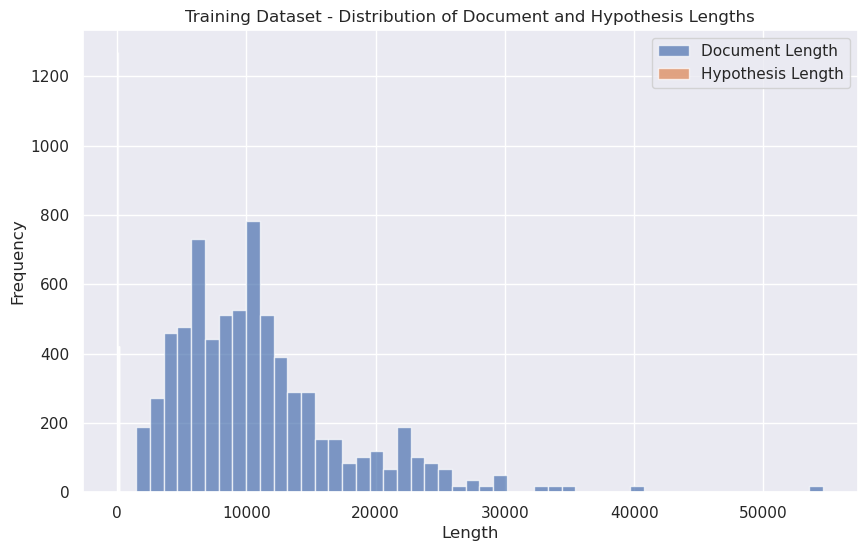

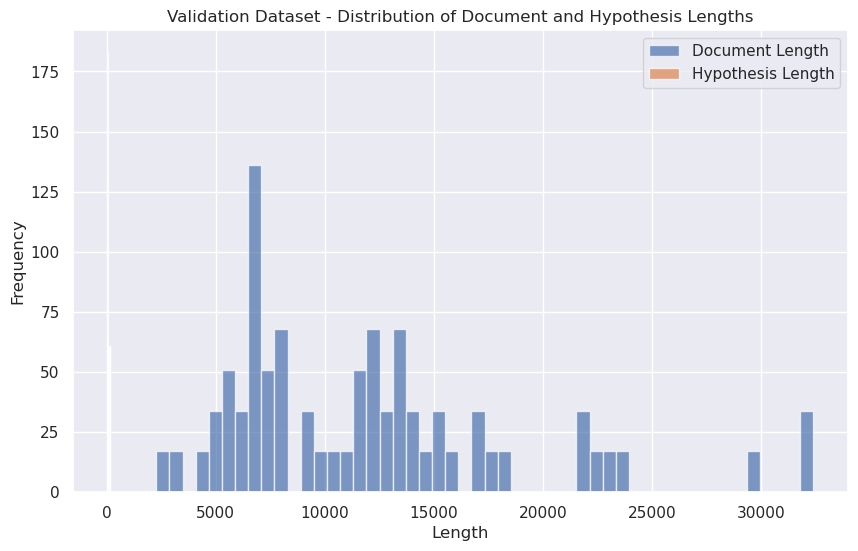

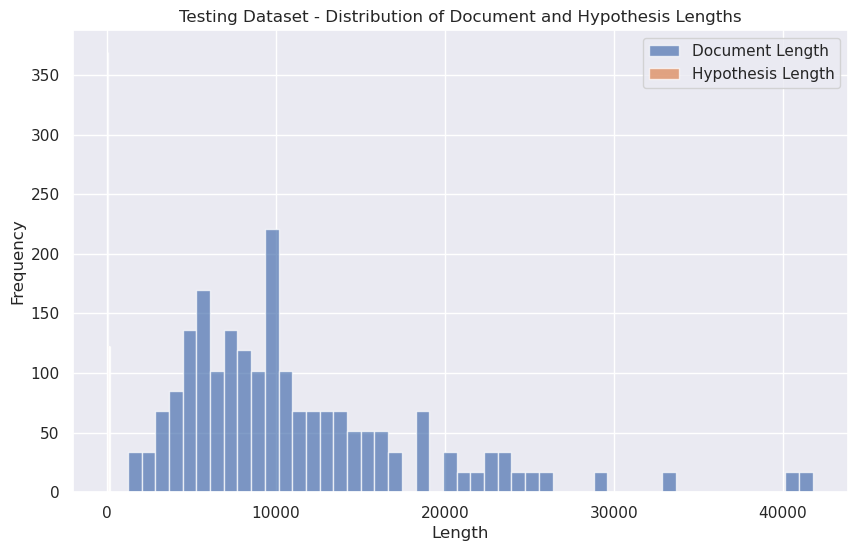

In [25]:
# Plot the distribution of document and hypothesis lengths for each dataset
plot_length_distribution(train_data, 'Training Dataset')
plot_length_distribution(dev_data, 'Validation Dataset')
plot_length_distribution(test_data, 'Testing Dataset')

The code will create three bar plots, one for each dataset (Training, Validation, and Testing). Each bar plot visualizes the distribution of labels in the corresponding dataset. The height of each bar represents the count of samples associated with a specific label. These visualizations offer a quick overview of the class distribution within each dataset, which is crucial for understanding the data balance and potential class imbalances. However, to see the actual plots.

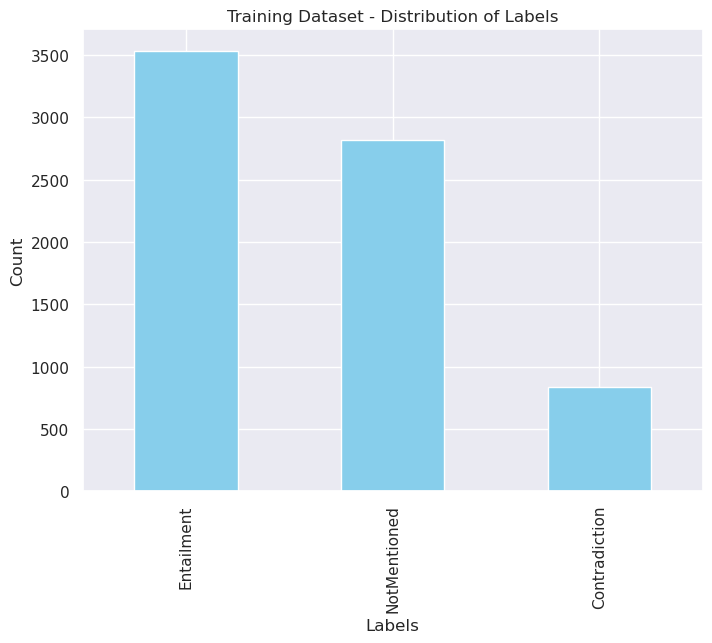

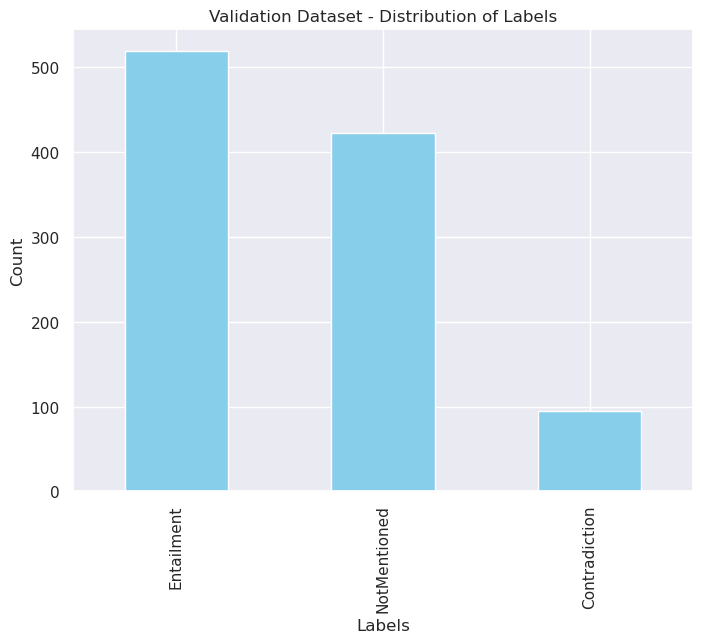

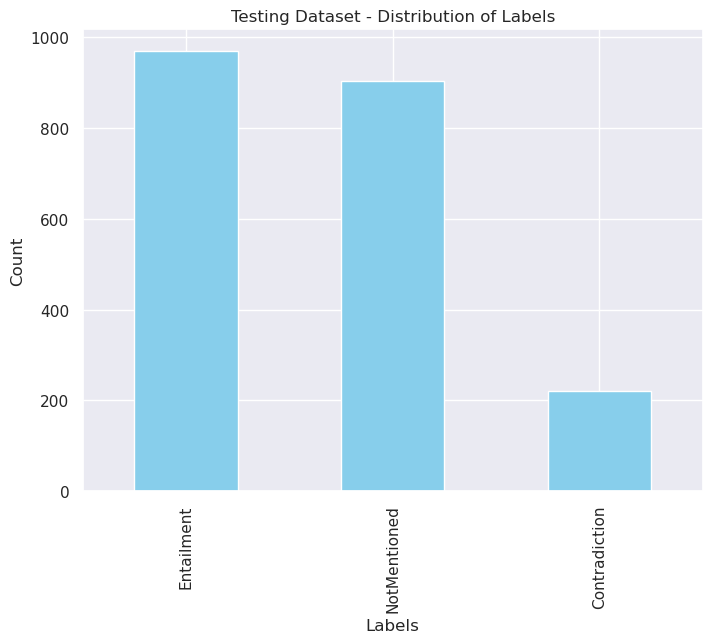

In [26]:
# Plot the distribution of labels for each dataset
plot_label_distribution(train_data, 'Training Dataset')
plot_label_distribution(dev_data, 'Validation Dataset')
plot_label_distribution(test_data, 'Testing Dataset')

The code will generate a bar plot that visualizes the average document and hypothesis lengths for each dataset (Training, Validation, and Testing). The x-axis of the bar plot represents the dataset names, and the y-axis shows the average lengths of documents and hypotheses. The bar plot will have two bars for each dataset: one for the average document length and another for the average hypothesis length.

This visualization allows to compare the average lengths of documents and hypotheses across different datasets, providing insights into the typical text length in each dataset. However, to see the actual plot.

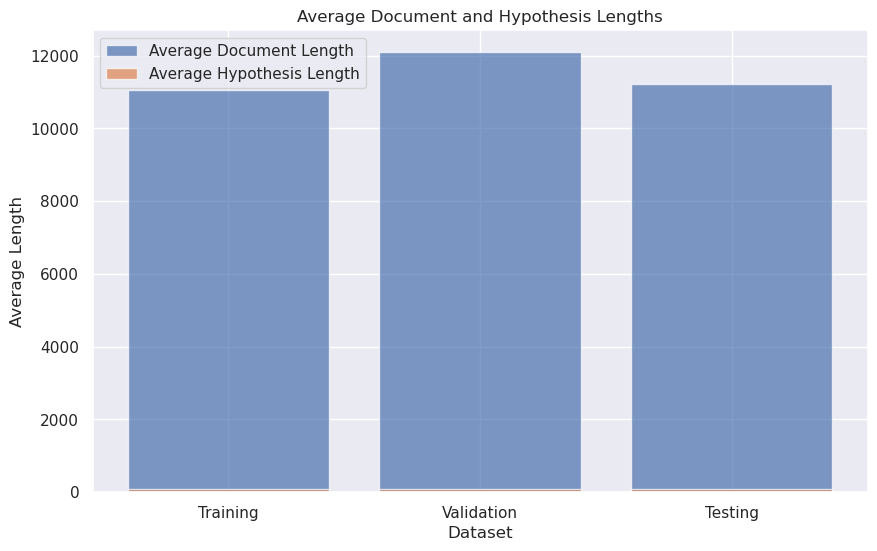

In [27]:
# Call the function to plot average document and hypothesis lengths
plot_avg_lengths(train_avg_doc_length, train_avg_hypothesis_length,
                 val_avg_doc_length, val_avg_hypothesis_length,
                 test_avg_doc_length, test_avg_hypothesis_length)

The code retrieves statistics regarding the 'text' column for each DataFrame (Training, Validation, and Testing). It calculates the number of unique texts in the 'text' column, the minimum and maximum lengths of texts, as well as the mean and median text lengths.

These statistics offer valuable insights into the diversity and distribution of text lengths within each dataset. Understanding these characteristics is essential for data preprocessing and modeling decisions. However, without the actual data, specific details about the text lengths cannot be provided.

In [28]:
# Retrieve some statistics regarding the 'text' column of each dataframe
print_text_stats(np.vectorize(len)(train_data['text'].unique()), "Train")
print_text_stats(np.vectorize(len)(dev_data['text'].unique()), "Validation")
print_text_stats(np.vectorize(len)(test_data['text'].unique()), "Test")

***Train Dataframe***
Number of unique texts in the dataframe: 423
Minimum length of a text found: 1481
Maximum length of a text found: 54571
Mean length: 11049.29
Median length: 9936.0
***Validation Dataframe***
Number of unique texts in the dataframe: 61
Minimum length of a text found: 2270
Maximum length of a text found: 32359
Mean length: 12094.97
Median length: 11299.0
***Test Dataframe***
Number of unique texts in the dataframe: 122
Minimum length of a text found: 1231
Maximum length of a text found: 41779
Mean length: 11204.28
Median length: 9589.0


This code will generate three separate histograms, each representing the distribution of text lengths for the 'text' column in the Training, Validation, and Testing datasets. The x-axis represents the length range, and the y-axis shows the frequency of texts falling within each length range. These plots provide visual insights into the distribution of text lengths in each dataset, helping to understand the variability and pattern of text lengths across the data.

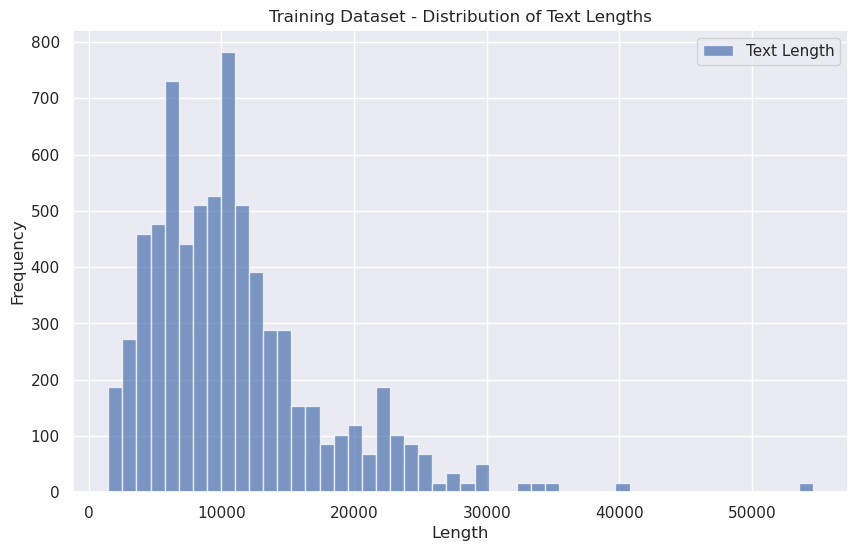

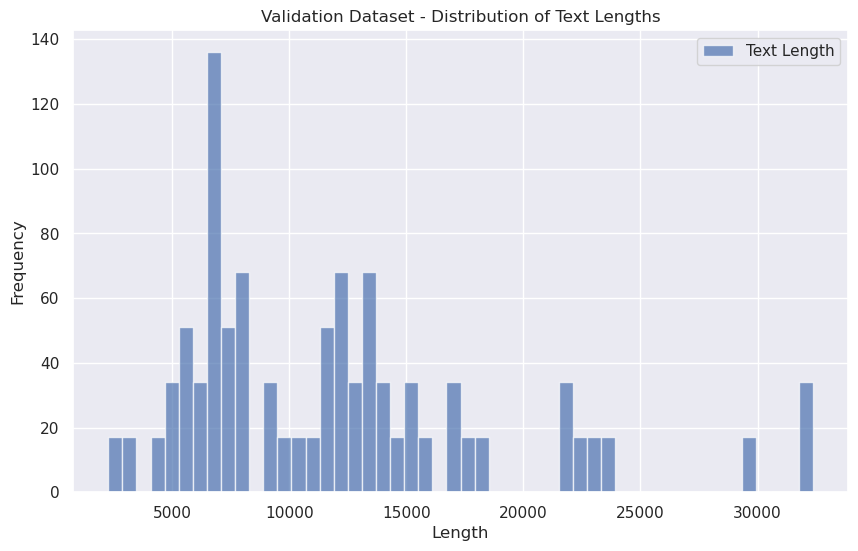

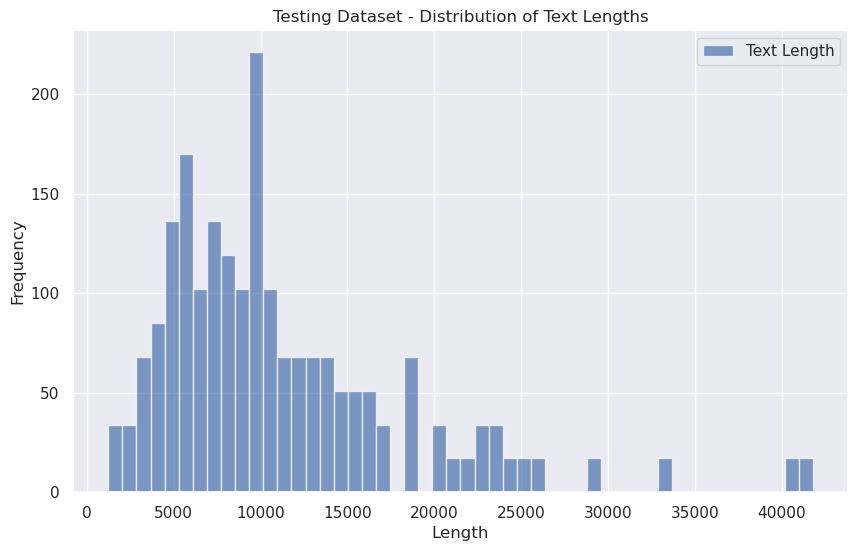

In [29]:
def plot_length_distribution(data_df, dataset_name):
    text_lengths = data_df['text'].apply(len)

    plt.figure(figsize=(10, 6))
    plt.hist(text_lengths, bins=50, alpha=0.7, label='Text Length')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.title(f'{dataset_name} - Distribution of Text Lengths')
    plt.legend()
    plt.show()

# Plot distribution for the Training Dataset
plot_length_distribution(train_data, 'Training Dataset')

# Plot distribution for the Validation Dataset
plot_length_distribution(dev_data, 'Validation Dataset')

# Plot distribution for the Testing Dataset
plot_length_distribution(test_data, 'Testing Dataset')


The code generates three pie plots, one for each dataset (Training, Validation, and Testing). Each pie plot visualizes the distribution of labels in the 'choice' column of the respective dataset. The size of each pie slice represents the percentage of each label in the dataset. The plots provide a quick and intuitive representation of the class distribution within each dataset, showing the relative frequencies of different labels. However, to see the actual pie plots.

Train set label distribution


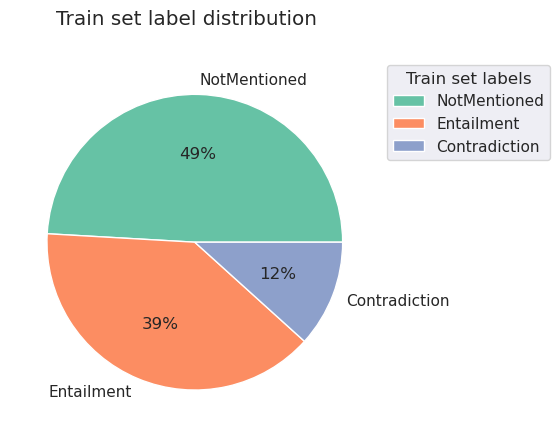

Validation set label distribution


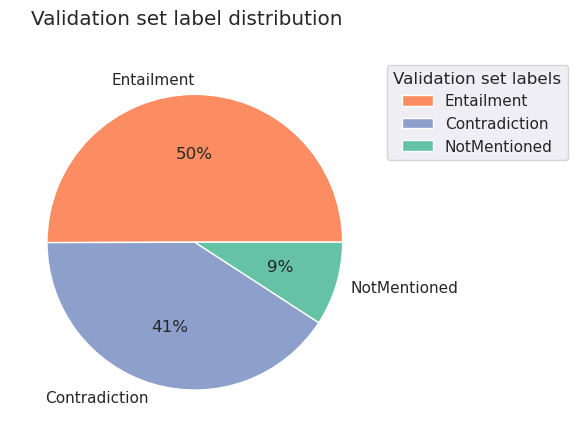

Test set label distribution


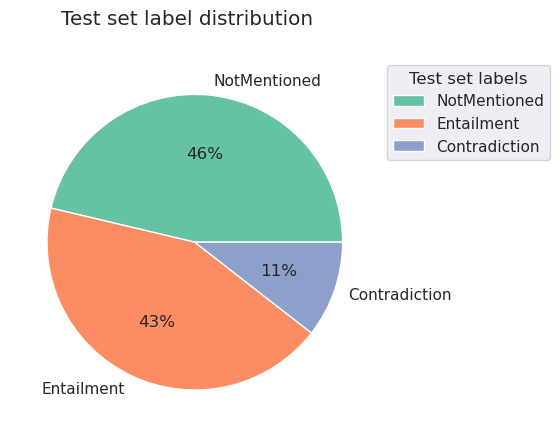

In [30]:
# Draw pie plots for the 'choice' columns in each of the dataframes

# Define a color dictionary to map each label to a color
color_dict = {'NotMentioned': '#66c2a5', 'Entailment': '#fc8d62', 'Contradiction': '#8da0cb', }
print("Train set label distribution")
#plt.figure(figsize=(12, 8))
plt.pie(train_data['choice'].value_counts(), labels=train_data['choice'].unique(), colors=[color_dict[label] for label in train_data['choice'].unique()], autopct='%.0f%%')
plt.suptitle('Train set label distribution')
plt.legend(title="Train set labels", labels=train_data['choice'].unique(), bbox_to_anchor=(1, 1))
plt.show();
print("Validation set label distribution")
#plt.figure(figsize=(12, 8))
plt.pie(dev_data['choice'].value_counts(), labels=dev_data['choice'].unique(), colors=[color_dict[label] for label in dev_data['choice'].unique()], autopct='%.0f%%')
plt.suptitle('Validation set label distribution')
plt.legend(title="Validation set labels", labels=dev_data['choice'].unique(), bbox_to_anchor=(1, 1))
plt.show();
print("Test set label distribution")
#plt.figure(figsize=(12, 8))
plt.pie(test_data['choice'].value_counts(), labels=test_data['choice'].unique(), colors=[color_dict[label] for label in test_data['choice'].unique()], autopct='%.0f%%')
plt.suptitle('Test set label distribution')
plt.legend(title="Test set labels", labels=test_data['choice'].unique(), bbox_to_anchor=(1, 1))
plt.show();

The  code snippets create mosaic plots using Seaborn's heatmap function to visualize the distribution of categories in three different datasets: `train_data`, `dev_data`, and `test_data`. Each plot represents the proportion of each category relative to the total count, displayed with annotations in percentages. The color map used is `YlGnBu`, which ranges from yellow to green to represent different percentages. These visualizations help compare the category distributions in each dataset and identify potential patterns or differences.

<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='col_0', ylabel='choice'>

Text(0.5, 1.0, 'Mosaic Plot - Distribution of Categories')

Text(0.5, 54.249999999999986, 'Category')

Text(91.24999999999999, 0.5, 'Percentage')

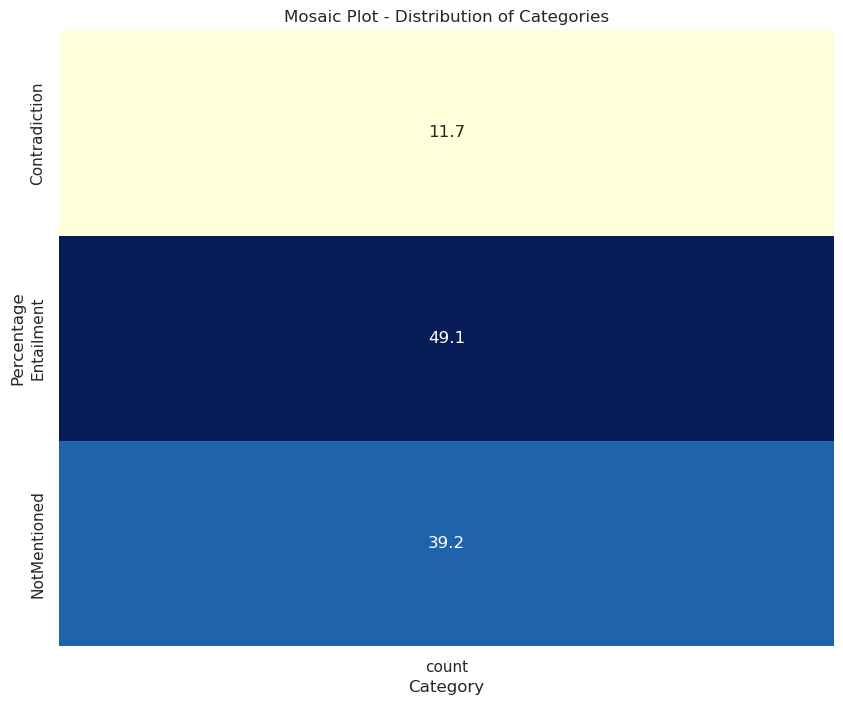

<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='col_0', ylabel='choice'>

Text(0.5, 1.0, 'Mosaic Plot - Distribution of Categories')

Text(0.5, 54.249999999999986, 'Category')

Text(91.24999999999999, 0.5, 'Percentage')

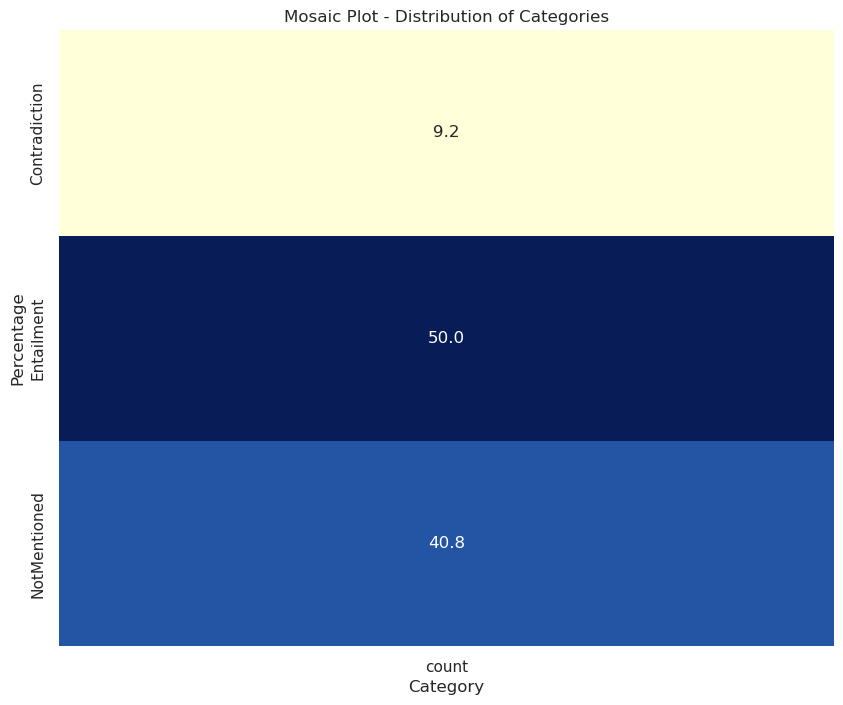

<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='col_0', ylabel='choice'>

Text(0.5, 1.0, 'Mosaic Plot - Distribution of Categories')

Text(0.5, 54.249999999999986, 'Category')

Text(91.24999999999999, 0.5, 'Percentage')

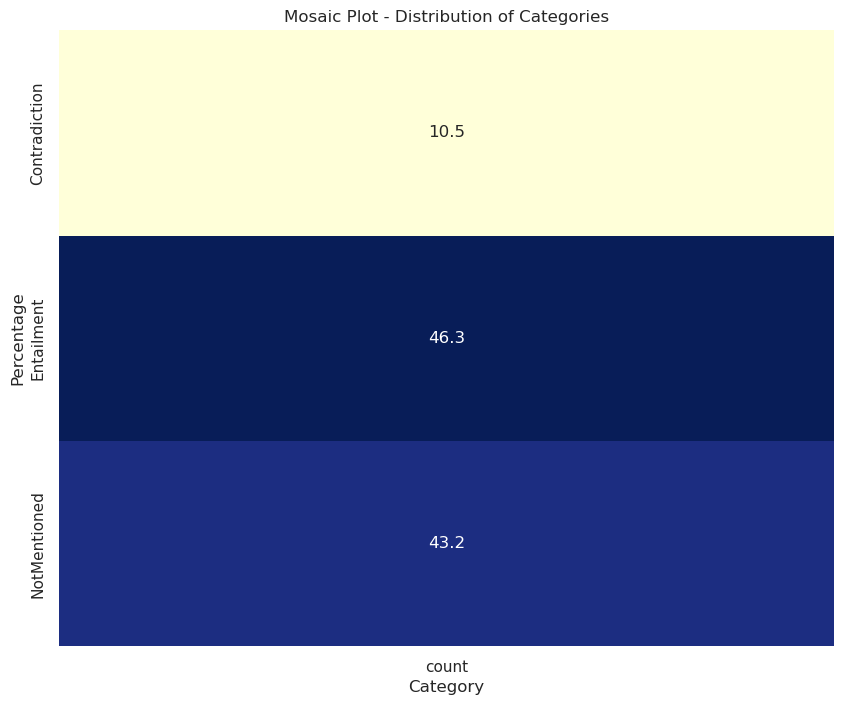

In [31]:
ct = pd.crosstab(index=train_data['choice'], columns='count')
ct_percentage = ct / ct.sum() * 100
plt.figure(figsize=(10, 8))
sns.heatmap(ct_percentage, annot=True, fmt=".1f", cmap='YlGnBu', cbar=False)
plt.title('Mosaic Plot - Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.show()

ct = pd.crosstab(index=dev_data['choice'], columns='count')
ct_percentage = ct / ct.sum() * 100
plt.figure(figsize=(10, 8))
sns.heatmap(ct_percentage, annot=True, fmt=".1f", cmap='YlGnBu', cbar=False)
plt.title('Mosaic Plot - Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.show()

ct = pd.crosstab(index=test_data['choice'], columns='count')
ct_percentage = ct / ct.sum() * 100
plt.figure(figsize=(10, 8))
sns.heatmap(ct_percentage, annot=True, fmt=".1f", cmap='YlGnBu', cbar=False)
plt.title('Mosaic Plot - Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.show()

The code generates two KDE (Kernel Density Estimation) plots for the Validation and Testing datasets. Each plot visualizes the distribution of hypotheses based on their corresponding labels in the 'choice' column. The x-axis represents the encoded numerical representation of hypotheses (after applying label encoding), and the y-axis represents the estimated density (probability) of hypotheses.

The different colored lines in each plot correspond to different labels in the 'choice' column, showing the distribution of hypotheses for each label within the dataset.

KDE plots are useful for understanding the distribution and patterns of hypotheses for each label in the dataset. However, to view the actual plots.

<Figure size 6000x600 with 0 Axes>

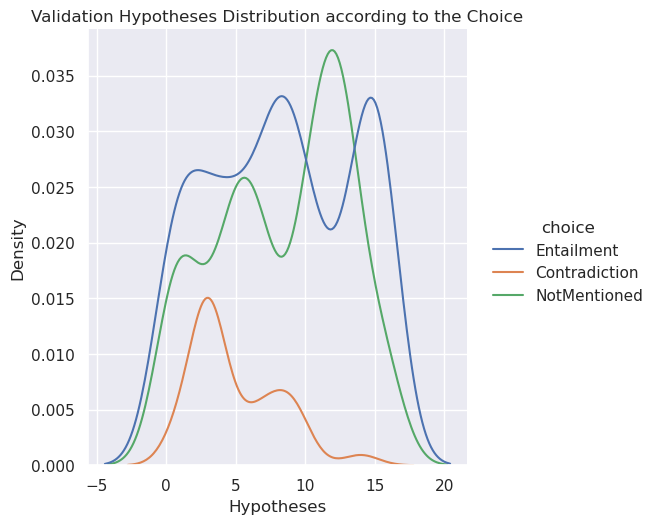

<Figure size 6000x600 with 0 Axes>

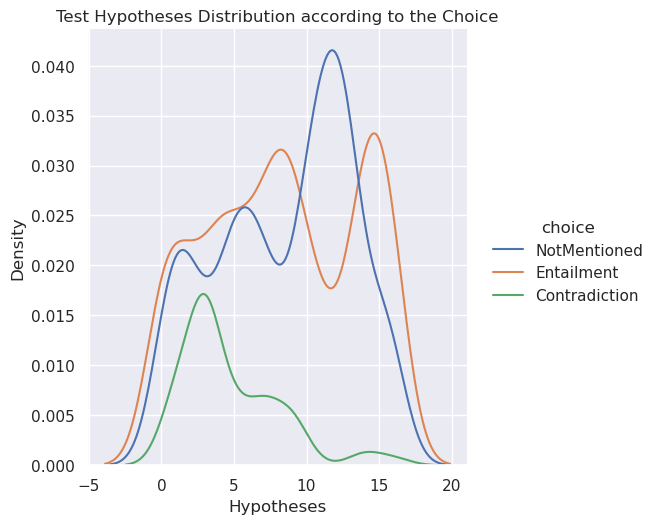

In [32]:
plt.figure(figsize=(60, 6))
sns.displot(dev_data, x=le.fit_transform(dev_data['hypothesis']) , hue='choice', kind="kde")
plt.xlabel('Hypotheses')
plt.title("Validation Hypotheses Distribution according to the Choice")
plt.show();

plt.figure(figsize=(60, 6))
sns.displot(test_data, x=le.fit_transform(test_data['hypothesis']) , hue='choice', kind="kde")
plt.xlabel('Hypotheses')
plt.title("Test Hypotheses Distribution according to the Choice")
plt.show();

## Question 2:


### 1. MODEL1: DeBERTa "Decoding-enhanced BERT with Disentangled Attention"

Some general reasons why I choose DeBERTa or any other model for a Natural Language Inference (NLI) task:

1. State-of-the-art performance: DeBERTa is known for achieving state-of-the-art results on various NLP tasks, including NLI. If DeBERTa has demonstrated superior performance in NLI compared to other models, it could be a compelling reason to choose it.

2. Specialized architecture: DeBERTa is designed with a specialized architecture that focuses on incorporating both sentence-level and token-level information effectively. This can be beneficial for NLI tasks, which require a comprehensive understanding of the relationship between sentences.

3. Pre-training on large corpora: DeBERTa is pre-trained on large-scale corpora, which enables it to capture rich semantic representations and context understanding. This can lead to improved generalization and better performance on downstream tasks like NLI.

4. Customizability: DeBERTa provides different model variants and configurations, allowing to fine-tune the model based on specific dataset and task requirements.

5. Availability and community support: DeBERTa is available through the Hugging Face Transformers library, which has extensive community support and documentation. This can simplify the implementation and fine-tuning process.

6. Experimentation: Choosing DeBERTa or any other model for NLI could also be driven by the need to experiment and compare its performance against other models to find the best fit for the specific NLI task at hand.

In [33]:
model_name = "microsoft/deberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [34]:
def tokenize_data(data):
    #the text and hypothesis will speperated by [sep] token to differentiate them.
    return tokenizer(text=data['text'].tolist(), text_pair=data['hypothesis'].tolist(), truncation=True, padding="max_length", max_length=512)

In [35]:
class ContractNLIDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(value[idx]) for key, value in self.encodings.items()}
        # Here we ensure the label is an integer tensor
        item['labels'] = torch.tensor(int(self.labels[idx]))
        return item

    def __len__(self):
        return len(self.labels)

In [36]:
label_mapping = {"NotMentioned": 0, "Entailment": 1, "Contradiction": 2}

train_labels = [label_mapping[label] for label in train_data['choice'].tolist()]
valid_labels = [label_mapping[label] for label in dev_data['choice'].tolist()]
test_labels = [label_mapping[label] for label in test_data['choice'].tolist()]
train_encodings = tokenize_data(train_data)
valid_encodings = tokenize_data(dev_data)
test_encodings = tokenize_data(test_data)

In [37]:
train_dataset = ContractNLIDataset(train_encodings, train_labels)
valid_dataset = ContractNLIDataset(valid_encodings, valid_labels)
test_dataset = ContractNLIDataset(test_encodings, test_labels)

In [38]:
train_dataset.encodings[0]

Encoding(num_tokens=512, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])

In [39]:
model1 = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)


training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
)

# def compute_metrics(p):
#     preds = np.argmax(p.predictions, axis=1)
#     return {"accuracy": (preds == p.label_ids).mean()}

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    labels = p.label_ids

    accuracy = accuracy_score(labels, preds)
    precision = precision_score(labels, preds, average='weighted')
    recall = recall_score(labels, preds, average='weighted')
    f1 = f1_score(labels, preds, average='weighted')

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

trainer1 = Trainer(
    model=model1,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

trainer1.train()


Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler.dense.weight', 'pooler.dense.bias', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.9/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.657700,0.780929,0.647059,0.666859,0.647059,0.633095
2,0.762800,0.680006,0.716490,0.717046,0.716490,0.716294
3,0.546300,0.653406,0.713597,0.719750,0.713597,0.715696


TrainOutput(global_step=2697, training_loss=0.7297758370096435, metrics={'train_runtime': 1408.859, 'train_samples_per_second': 15.312, 'train_steps_per_second': 1.914, 'total_flos': 6614280971596800.0, 'train_loss': 0.7297758370096435, 'epoch': 3.0})

In [40]:
# Save the trained model
model1.save_pretrained("./saved_model1")

In [41]:
# Save evaluation metrics to a file
metrics1 = trainer1.evaluate()
with open("./evaluation_metrics1.txt", "w") as f:
    for key, value in metrics1.items():
        f.write(f"{key}: {value}\n")

30

34

35

32

28

22

32

28

11

The report for the model:

- Evaluation Loss: 0.6534055471420288
- Evaluation Accuracy: 0.7135969141755063
- Evaluation Precision: 0.7197504106081059
- Evaluation Recall: 0.7135969141755063
- Evaluation F1 Score: 0.7156958303058087
- Evaluation Runtime: 18.1049 seconds
- Evaluation Samples per Second: 57.277
- Evaluation Steps per Second: 7.18
- Epoch: 3.0

This report represents the performance of the model on the evaluation dataset after three epochs of training. The evaluation loss is the average loss on the evaluation dataset, and the accuracy, precision, recall, and F1 score are classification metrics that measure the model's ability to correctly classify instances. The evaluation runtime, samples per second, and steps per second provide information about the time taken to perform the evaluation.

The results indicate that the model achieved relatively good accuracy, precision, recall, and F1 score on the evaluation dataset.

In [42]:
pred1 = trainer1.predict(test_dataset)
metrics_result1 = compute_metrics(pred1)

In [ ]:
# Get the test logits
test_logits = trainer1.predict(test_dataset).predictions

# Get the predicted labels
test_preds = np.argmax(test_logits, axis=1)
print(test_preds)

# Mapping the predictions to their string representations
preds1 = pd.Series(test_preds).map({v: k for k, v in label_mapping.items()})

In [48]:
test_data['pred1'] = preds1

In [50]:
# Save the DataFrame to a CSV file
output_file_path1 = 'output_file1.csv'
test_data.to_csv(output_file_path1, index=False)

In [51]:
output_file_path1 = 'output_file1.txt'

with open(output_file_path1, 'w') as file:
    for metric_name, metric_value in metrics_result1.items():
        line = f"{metric_name}: {metric_value}\n"
        file.write(line)

29

30

27

23

The model's evaluation metrics for a binary classification task on the evaluation dataset are as follows:

- Accuracy: 70.35%
- Precision: 70.41%
- Recall: 70.35%
- F1 Score: 70.25%

These metrics provide insights into the model's performance. Accuracy measures the overall correct predictions, precision focuses on true positives among predicted positives, recall measures true positives among actual positives, and the F1 score balances precision and recall.

### 2- MODEL2: MPNet "MobileBERT Pre-trained Language Model"

Another powerful model for Natural Language Inference (NLI) and other NLP tasks. 
Here are some reasons why I choose MPNet for an NLI task:

1. Model Size and Performance: MPNet is a large and powerful model, trained on a massive amount of data. Larger models like MPNet tend to have better performance on various NLP tasks, including NLI, due to their ability to capture more complex linguistic patterns and representations.

2. Pre-training Strategy: MPNet is pre-trained using a variant of the Megatron-LM architecture, which includes important techniques like dynamic masking and data augmentation. These strategies help to enhance the model's robustness and understanding of context.

3. Multi-Task Learning: MPNet is trained using a multi-task learning approach, where it jointly learns to perform several NLP tasks simultaneously. This can lead to improved generalization and better performance on NLI and related tasks.

4. Large Context Window: MPNet has a large context window, allowing it to take into account more contextual information in the input text. This can be advantageous for NLI tasks, which require a thorough understanding of the relationship between sentences.

5. Community Adoption: MPNet is part of the Hugging Face Transformers library, a popular open-source library for NLP that enjoys strong community support. This ensures that the model is well-maintained and frequently updated, making it easier to integrate into projects.

6. Transfer Learning: Due to its pre-training on a large corpus, MPNet can be effectively fine-tuned on specific NLI datasets with a relatively small amount of labeled data. This enables transfer learning, where the model leverages its pre-trained knowledge to adapt to new tasks efficiently.

In [55]:
test_data = pd.read_csv('output_file1.csv')

In [56]:
model_name = 'sentence-transformers/nli-mpnet-base-v2'
model = AutoModel.from_pretrained(model_name)

In [57]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [58]:
def tokenize_data(data):
    #the text and hypothesis will speperated by [sep] token to differentiate them.
    return tokenizer(text=data['text'].tolist(), text_pair=data['hypothesis'].tolist(), truncation=True, padding="max_length", max_length=512)

In [59]:
class ContractNLIDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(value[idx]) for key, value in self.encodings.items()}
        # Here we ensure the label is an integer tensor
        item['labels'] = torch.tensor(int(self.labels[idx]))
        return item

    def __len__(self):
        return len(self.labels)

In [60]:
label_mapping = {"NotMentioned": 0, "Entailment": 1, "Contradiction": 2}

train_labels = [label_mapping[label] for label in train_data['choice'].tolist()]
valid_labels = [label_mapping[label] for label in dev_data['choice'].tolist()]
test_labels = [label_mapping[label] for label in test_data['choice'].tolist()]
train_encodings = tokenize_data(train_data)
valid_encodings = tokenize_data(dev_data)
test_encodings = tokenize_data(test_data)

In [61]:
train_dataset = ContractNLIDataset(train_encodings, train_labels)
valid_dataset = ContractNLIDataset(valid_encodings, valid_labels)
test_dataset = ContractNLIDataset(test_encodings, test_labels)

In [62]:
train_dataset.encodings[0]

Encoding(num_tokens=512, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])

In [64]:
model2 = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
)

# def compute_metrics(p):
#     preds = np.argmax(p.predictions, axis=1)
#     return {"accuracy": (preds == p.label_ids).mean()}

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    labels = p.label_ids

    accuracy = accuracy_score(labels, preds)
    precision = precision_score(labels, preds, average='weighted')
    recall = recall_score(labels, preds, average='weighted')
    f1 = f1_score(labels, preds, average='weighted')

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}


trainer2 = Trainer(
    model=model2,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

trainer2.train()

Some weights of MPNetForSequenceClassification were not initialized from the model checkpoint at sentence-transformers/nli-mpnet-base-v2 and are newly initialized: ['classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.789900,0.784806,0.653809,0.678296,0.653809,0.655981
2,0.737100,0.702909,0.694311,0.700636,0.694311,0.690782
3,0.583700,0.656678,0.706847,0.721910,0.706847,0.711873


TrainOutput(global_step=2697, training_loss=0.7153640346788768, metrics={'train_runtime': 1066.166, 'train_samples_per_second': 20.234, 'train_steps_per_second': 2.53, 'total_flos': 5676145760646144.0, 'train_loss': 0.7153640346788768, 'epoch': 3.0})

In [65]:
# Save the trained model
model2.save_pretrained("./saved_model2")

# Save evaluation metrics to a file
metrics2 = trainer2.evaluate()
with open("./evaluation_metrics2.txt", "w") as f:
    for key, value in metrics2.items():
        f.write(f"{key}: {value}\n")

30

34

34

32

28

22

32

28

11

The evaluation metrics for the model on the evaluation dataset are:

- Evaluation Loss: 0.6566776633262634
- Evaluation Accuracy: 70.68%
- Evaluation Precision: 72.19%
- Evaluation Recall: 70.68%
- Evaluation F1 Score: 71.19%
- Evaluation Runtime: 26.2605 seconds
- Evaluation Samples per Second: 39.489
- Evaluation Steps per Second: 4.95
- Epoch: 3.0


In [66]:
pred2 = trainer2.predict(test_dataset)
metrics_result2 = compute_metrics(pred2)

In [67]:
# Get the test logits
test_logits = trainer2.predict(test_dataset).predictions

# Get the predicted labels
test_preds = np.argmax(test_logits, axis=1)
print(test_preds)

# Mapping the predictions to their string representations
preds2 = pd.Series(test_preds).map({v: k for k, v in label_mapping.items()})

[0 0 1 ... 1 1 1]


In [68]:
test_data['pred2'] = preds2

In [69]:
# Save the DataFrame to a CSV file
output_file_path2 = 'output_file2.csv'
test_data.to_csv(output_file_path2, index=False)

In [70]:
output_file_path2 = 'output_file2.txt'

with open(output_file_path2, 'w') as file:
    for metric_name, metric_value in metrics_result2.items():
        line = f"{metric_name}: {metric_value}\n"
        file.write(line)

29

30

27

23

The performance of the model on the evaluation dataset is as follows:

- Accuracy: 70.97%
- Precision: 71.49%
- Recall: 70.97%
- F1 Score: 71.08%

These metrics represent the model's performance in a classification task on the evaluation dataset.

Interpretation of the metrics:

- Accuracy: The proportion of correctly classified instances out of the total number of instances. An accuracy of 70.97% indicates that the model correctly predicted approximately 70.97% of the instances in the evaluation dataset.

- Precision: The proportion of true positive predictions out of all positive predictions. A precision of 71.49% means that approximately 71.49% of the instances predicted as positive by the model were indeed positive.

- Recall: The proportion of true positive predictions out of all actual positive instances. A recall of 70.97% indicates that approximately 70.97% of the actual positive instances were correctly identified as positive by the model.

- F1 Score: The harmonic mean of precision and recall. It provides a single metric that balances both precision and recall. An F1 score of 71.08% indicates the overall effectiveness of the model in achieving a balance between precision and recall.


### 3- MODEL3: Albert

test_data = read_csv('output_file1.csv')It is designed to reduce the number of parameters while maintaining or even improving performance on various NLP tasks, including Natural Language Inference (NLI). Here are some reasons why I choose ALBERT for an NLI task:

1. Parameter Efficiency: ALBERT achieves parameter efficiency by applying parameter sharing techniques. It shares parameters across layers, reducing the overall number of parameters compared to the original BERT model. This makes ALBERT more memory-efficient and faster to train and fine-tune.

2. Improved Training Efficiency: The parameter sharing in ALBERT enables more effective utilization of resources during training, allowing larger batch sizes, which can speed up the training process and make it more stable.

3. Better Generalization: Due to its parameter sharing approach, ALBERT is exposed to more diverse sentence pairs during training. This can lead to better generalization and improved performance on downstream tasks like NLI.

4. Different Model Sizes: ALBERT comes in several model sizes, ranging from small to extra-large. This provides flexibility in choosing a model based on the available computational resources and the specific NLI task requirements.

5. Pre-training Improvements: ALBERT introduces techniques such as Sentence-Order Prediction (SOP) to improve the pre-training process. SOP helps ALBERT learn sentence-level coherence by predicting the order of sentences in a pair.

6. Community Support: ALBERT is part of the Hugging Face Transformers library, which enjoys strong community support. This ensures that the model is well-maintained, frequently updated, and easy to integrate into projects.

7. Transfer Learning: Like other transformer-based models, ALBERT benefits from transfer learning. It can be pre-trained on a large corpus and then fine-tuned on specific NLI datasets with a smaller amount of labeled data, effectively leveraging its pre-trained knowledge.

In [71]:
test_data = pd.read_csv('output_file2.csv')

In [72]:
model_name = "albert-base-v2"
model = AutoModel.from_pretrained(model_name)

In [73]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [74]:
def tokenize_data(data):
    #the text and hypothesis will speperated by [sep] token to differentiate them.
    return tokenizer(text=data['text'].tolist(), text_pair=data['hypothesis'].tolist(), truncation=True, padding="max_length", max_length=512)

In [75]:
class ContractNLIDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(value[idx]) for key, value in self.encodings.items()}
        # Here we ensure the label is an integer tensor
        item['labels'] = torch.tensor(int(self.labels[idx]))
        return item

    def __len__(self):
        return len(self.labels)

In [76]:
label_mapping = {"NotMentioned": 0, "Entailment": 1, "Contradiction": 2}

train_labels = [label_mapping[label] for label in train_data['choice'].tolist()]
valid_labels = [label_mapping[label] for label in dev_data['choice'].tolist()]
test_labels = [label_mapping[label] for label in test_data['choice'].tolist()]

train_encodings = tokenize_data(train_data)
valid_encodings = tokenize_data(dev_data)
test_encodings = tokenize_data(test_data)

In [77]:
train_dataset = ContractNLIDataset(train_encodings, train_labels)
valid_dataset = ContractNLIDataset(valid_encodings, valid_labels)
test_dataset = ContractNLIDataset(test_encodings, test_labels)

In [78]:
train_dataset.encodings[0]

Encoding(num_tokens=512, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])

In [79]:
model3 = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
)

# def compute_metrics(p):
#     preds = np.argmax(p.predictions, axis=1)
#     return {"accuracy": (preds == p.label_ids).mean()}

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    labels = p.label_ids

    accuracy = accuracy_score(labels, preds)
    precision = precision_score(labels, preds, average='weighted')
    recall = recall_score(labels, preds, average='weighted')
    f1 = f1_score(labels, preds, average='weighted')

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}


trainer3 = Trainer(
    model=model3,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

trainer3.train()

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.9/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a AlbertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.683900,0.795448,0.601736,0.631452,0.601736,0.602401
2,0.764600,0.780251,0.643202,0.663616,0.643202,0.621536
3,0.551300,0.641905,0.714561,0.724008,0.714561,0.717830


TrainOutput(global_step=2697, training_loss=0.7271417906693631, metrics={'train_runtime': 775.5529, 'train_samples_per_second': 27.816, 'train_steps_per_second': 3.478, 'total_flos': 515604712633344.0, 'train_loss': 0.7271417906693631, 'epoch': 3.0})

In [80]:
# Save the trained model
model3.save_pretrained("./saved_model3")

# Save evaluation metrics to a file
metrics3 = trainer3.evaluate()
with open("./evaluation_metrics3.txt", "w") as f:
    for key, value in metrics3.items():
        f.write(f"{key}: {value}\n")


30

34

35

32

28

20

32

30

11

The performance of the model on the evaluation dataset is as follows:

- Evaluation Loss: 0.6419046521186829
- Evaluation Accuracy: 71.46%
- Evaluation Precision: 72.40%
- Evaluation Recall: 71.46%
- Evaluation F1 Score: 71.78%
- Evaluation Runtime: 12.51 seconds
- Evaluation Samples per Second: 82.894
- Evaluation Steps per Second: 10.392
- Epoch: 3.0


In [81]:
pred3 = trainer3.predict(test_dataset)
metrics_result3 = compute_metrics(pred3)

In [82]:
# Get the test logits
test_logits = trainer3.predict(test_dataset).predictions

# Get the predicted labels
test_preds = np.argmax(test_logits, axis=1)
print(test_preds)

# Mapping the predictions to their string representations
preds3 = pd.Series(test_preds).map({v: k for k, v in label_mapping.items()})

[0 0 1 ... 1 1 1]


In [83]:
test_data['pred3'] = preds3

In [84]:
# Save the DataFrame to a CSV file
output_file_path3 = 'output_file3.csv'
test_data.to_csv(output_file_path3, index=False)

In [85]:
output_file_path3 = 'output_file3.txt'

with open(output_file_path3, 'w') as file:
    for metric_name, metric_value in metrics_result3.items():
        line = f"{metric_name}: {metric_value}\n"
        file.write(line)

29

30

27

23

The performance of the model on the evaluation dataset is as follows:

- Evaluation Accuracy: 71.21%
- Evaluation Precision: 71.54%
- Evaluation Recall: 71.21%
- Evaluation F1 Score: 71.31%

These metrics represent the model's performance in a classification task on the evaluation dataset.

Interpretation of the metrics:

- Evaluation Accuracy: The proportion of correctly classified instances out of the total number of instances. An accuracy of 71.21% means that the model correctly predicted approximately 71.21% of the instances in the evaluation dataset.

- Evaluation Precision: The proportion of true positive predictions out of all positive predictions. A precision of 71.54% indicates that approximately 71.54% of the instances predicted as positive by the model were indeed positive.

- Evaluation Recall: The proportion of true positive predictions out of all actual positive instances. A recall of 71.21% means that approximately 71.21% of the actual positive instances were correctly identified as positive by the model.

- Evaluation F1 Score: The harmonic mean of precision and recall. An F1 score of 71.31% indicates the overall effectiveness of the model in achieving a balance between precision and recall.

## Question 3:

#### Compare the performance

In [86]:
test_data = pd.read_csv('output_file3.csv')

In [87]:
# Read the file content
with open('evaluation_metrics1.txt', 'r') as file:
    file_content = file.read()
# # Print the content
# print(file_content)
# Convert file_content to a dictionary
metrics_dict = {}
lines = file_content.strip().split('\n')
for line in lines:
    metric_name, metric_value = line.split(': ')
    metrics_dict[metric_name] = float(metric_value)

# Print the dictionary
print(metrics_dict)
metrics1 = metrics_dict

{'eval_loss': 0.6534055471420288, 'eval_accuracy': 0.7135969141755063, 'eval_precision': 0.7197504106081059, 'eval_recall': 0.7135969141755063, 'eval_f1': 0.7156958303058087, 'eval_runtime': 18.1049, 'eval_samples_per_second': 57.277, 'eval_steps_per_second': 7.18, 'epoch': 3.0}


In [88]:
# Read the file content
with open('evaluation_metrics2.txt', 'r') as file:
    file_content = file.read()
# # Print the content
# print(file_content)
# Convert file_content to a dictionary
metrics_dict = {}
lines = file_content.strip().split('\n')
for line in lines:
    metric_name, metric_value = line.split(': ')
    metrics_dict[metric_name] = float(metric_value)

# Print the dictionary
print(metrics_dict)
metrics2 = metrics_dict

{'eval_loss': 0.6566776633262634, 'eval_accuracy': 0.7068466730954677, 'eval_precision': 0.721910460810081, 'eval_recall': 0.7068466730954677, 'eval_f1': 0.7118734151744522, 'eval_runtime': 26.2605, 'eval_samples_per_second': 39.489, 'eval_steps_per_second': 4.95, 'epoch': 3.0}


In [89]:
# Read the file content
with open('evaluation_metrics3.txt', 'r') as file:
    file_content = file.read()
# # Print the content
# print(file_content)
# Convert file_content to a dictionary
metrics_dict = {}
lines = file_content.strip().split('\n')
for line in lines:
    metric_name, metric_value = line.split(': ')
    metrics_dict[metric_name] = float(metric_value)

# Print the dictionary
print(metrics_dict)
metrics3 = metrics_dict

{'eval_loss': 0.6419046521186829, 'eval_accuracy': 0.7145612343297975, 'eval_precision': 0.7240079514900297, 'eval_recall': 0.7145612343297975, 'eval_f1': 0.7178303855271941, 'eval_runtime': 12.51, 'eval_samples_per_second': 82.894, 'eval_steps_per_second': 10.392, 'epoch': 3.0}


* Accuracy: Model 3 has the highest accuracy (0.715) followed by Model 1 (0.714) and then Model 2 (0.707).
* Precision: Model 3 has the highest precision (0.724) followed by Model 1 (0.720) and then Model 2 (0.722).
* Recall: Model 3 has the highest recall (0.715) followed by Model 1 (0.714) and then Model 2 (0.707).
* F1 Score: Model 3 has the highest F1 score (0.718) followed by Model 1 (0.716) and then Model 2 (0.712).
* Evaluation Runtime: Model 3 has the lowest evaluation runtime (12.51 seconds) followed by Model 1 (18.10 seconds) and then Model 2 (26.26 seconds).

In [90]:
val_labels = ['NotMentioned', 'Entailment', 'Contradiction']

In [91]:
# Create a dictionary to store the metrics for each model validation
models_metrics = {
    'model1': metrics1,
    'model2': metrics2,
    'model3': metrics3
}

# Determine the order for each metric based on the model performance
metric_order_accuracy = sorted(models_metrics, key=lambda model: models_metrics[model]['eval_accuracy'], reverse=True)
metric_order_precision = sorted(models_metrics, key=lambda model: models_metrics[model]['eval_precision'], reverse=True)
metric_order_recall = sorted(models_metrics, key=lambda model: models_metrics[model]['eval_recall'], reverse=True)
metric_order_f1 = sorted(models_metrics, key=lambda model: models_metrics[model]['eval_f1'], reverse=True)

print("Metric Order (Descending) for Accuracy:", metric_order_accuracy)
print("Metric Order (Descending) for Precision:", metric_order_precision)
print("Metric Order (Descending) for Recall:", metric_order_recall)
print("Metric Order (Descending) for F1-Score:", metric_order_f1)

Metric Order (Descending) for Accuracy: ['model3', 'model1', 'model2']
Metric Order (Descending) for Precision: ['model3', 'model2', 'model1']
Metric Order (Descending) for Recall: ['model3', 'model1', 'model2']
Metric Order (Descending) for F1-Score: ['model3', 'model1', 'model2']


In [92]:
# Read the file content
with open('output_file1.txt', 'r') as file:
    file_content = file.read()
# # Print the content
# print(file_content)
# Convert file_content to a dictionary
metrics_dict = {}
lines = file_content.strip().split('\n')
for line in lines:
    metric_name, metric_value = line.split(': ')
    metrics_dict[metric_name] = float(metric_value)

# Print the dictionary
print(metrics_dict)
metrics_result1 = metrics_dict

{'accuracy': 0.7034911525585844, 'precision': 0.7041122409195265, 'recall': 0.7034911525585844, 'f1': 0.7025127692081783}


In [93]:
# Read the file content
with open('output_file2.txt', 'r') as file:
    file_content = file.read()
# # Print the content
# print(file_content)
# Convert file_content to a dictionary
metrics_dict = {}
lines = file_content.strip().split('\n')
for line in lines:
    metric_name, metric_value = line.split(': ')
    metrics_dict[metric_name] = float(metric_value)

# Print the dictionary
print(metrics_dict)
metrics_result2 = metrics_dict

{'accuracy': 0.7097082735533238, 'precision': 0.7148874128436591, 'recall': 0.7097082735533238, 'f1': 0.7108427173660404}


In [94]:
# Read the file content
with open('output_file3.txt', 'r') as file:
    file_content = file.read()
# # Print the content
# print(file_content)
# Convert file_content to a dictionary
metrics_dict = {}
lines = file_content.strip().split('\n')
for line in lines:
    metric_name, metric_value = line.split(': ')
    metrics_dict[metric_name] = float(metric_value)

# Print the dictionary
print(metrics_dict)
metrics_result3 = metrics_dict

{'accuracy': 0.7120994739359159, 'precision': 0.7153853763679009, 'recall': 0.7120994739359159, 'f1': 0.7130518221763085}


* Accuracy: Model 3 has the highest accuracy (0.712) followed by Model 2 (0.710) and then Model 1 (0.703).
* Precision: Model 3 has the highest precision (0.715) followed by Model 2 (0.715) and then Model 1 (0.704).
* Recall: Model 3 has the highest recall (0.712) followed by Model 2 (0.710) and then Model 1 (0.703).
* F1 Score: Model 3 has the highest F1 score (0.713) followed by Model 2 (0.711) and then Model 1 (0.703).

In [95]:
# Create a dictionary to store the metrics for each model testing
models_metrics = {
    'model1': metrics_result1,
    'model2': metrics_result2,
    'model3': metrics_result3
}

# Determine the order for each metric based on the model performance
metric_order_accuracy = sorted(models_metrics, key=lambda model: models_metrics[model]['accuracy'], reverse=True)
metric_order_precision = sorted(models_metrics, key=lambda model: models_metrics[model]['precision'], reverse=True)
metric_order_recall = sorted(models_metrics, key=lambda model: models_metrics[model]['recall'], reverse=True)
metric_order_f1 = sorted(models_metrics, key=lambda model: models_metrics[model]['f1'], reverse=True)

print("Metric Order (Descending) for Accuracy:", metric_order_accuracy)
print("Metric Order (Descending) for Precision:", metric_order_precision)
print("Metric Order (Descending) for Recall:", metric_order_recall)
print("Metric Order (Descending) for F1-Score:", metric_order_f1)

Metric Order (Descending) for Accuracy: ['model3', 'model2', 'model1']
Metric Order (Descending) for Precision: ['model3', 'model2', 'model1']
Metric Order (Descending) for Recall: ['model3', 'model2', 'model1']
Metric Order (Descending) for F1-Score: ['model3', 'model2', 'model1']


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 32.249999999999986, 'Predicted Labels')

Text(66.25, 0.5, 'True Labels')

Text(0.5, 1.0, 'Confusion Matrix - Model 1')

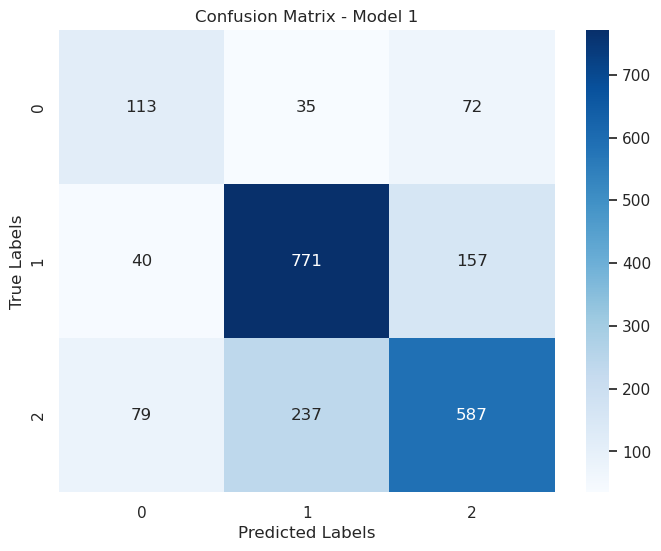

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 32.249999999999986, 'Predicted Labels')

Text(66.25, 0.5, 'True Labels')

Text(0.5, 1.0, 'Confusion Matrix - Model 2')

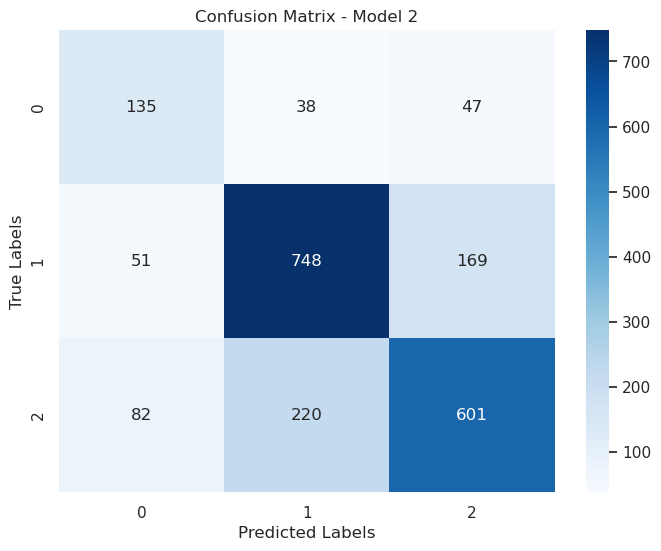

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 32.249999999999986, 'Predicted Labels')

Text(66.25, 0.5, 'True Labels')

Text(0.5, 1.0, 'Confusion Matrix - Model 3')

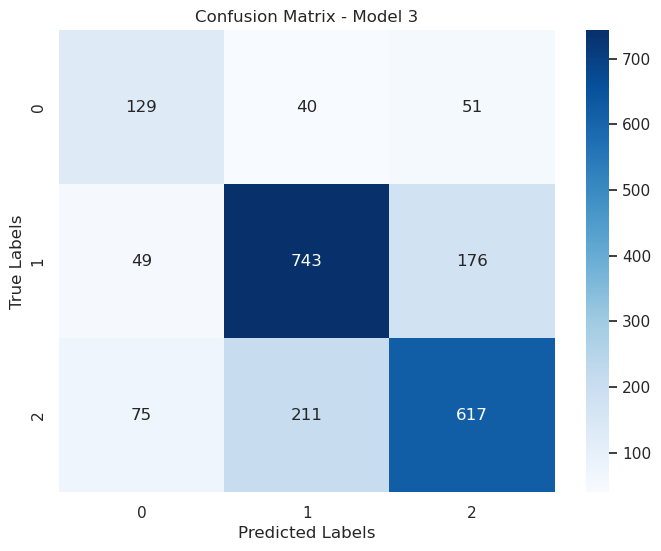

In [96]:
# Confusion matrix for Model 1
cm_model1 = confusion_matrix(test_data['choice'], test_data['pred1'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_model1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Model 1')
plt.show()

# Confusion matrix for Model 2
cm_model2 = confusion_matrix(test_data['choice'], test_data['pred2'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_model2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Model 2')
plt.show()

# Confusion matrix for Model 3
cm_model3 = confusion_matrix(test_data['choice'], test_data['pred3'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_model3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Model 3')
plt.show()


In [115]:
# Incorrect predictions model1
incorrect_predictions = test_data[test_data['choice'] != test_data['pred1']]

# Incorrect predictions count
num_incorrect_predictions = len(incorrect_predictions)

# Percentage of incorrect predictions
incorrect_percentage = (num_incorrect_predictions / len(test_data)) * 100

# Display results
print(f"Number of Incorrect Predictions: {num_incorrect_predictions}")
print(f"Percentage of Incorrect Predictions: {incorrect_percentage:.2f}%")

# # Display the first few rows of the DataFrame containing incorrect predictions
# print(incorrect_predictions.head())

Number of Incorrect Predictions: 620
Percentage of Incorrect Predictions: 29.65%


In [116]:
# Group by the actual labels and count the number of occurrences for each label
label_counts = test_data['choice'].value_counts()

# Group by the actual labels and calculate the number of incorrect predictions for each label
incorrect_counts = test_data[test_data['choice'] != test_data['pred1']]['choice'].value_counts()

# Calculate the percentage of error predictions for each label
error_percentage = (incorrect_counts / label_counts) * 100

# Display the results
print("Error Percentage for Each Label:")
print(error_percentage)


Error Percentage for Each Label:
choice
Contradiction    48.636364
Entailment       20.351240
NotMentioned     34.994463
Name: count, dtype: float64


Based on the testing results for Model 1, there are 620 incorrect predictions out of the total samples, resulting in an error percentage of 29.65%.

Additionally, the error percentage for each label is as follows:
- For the label "Contradiction," the error percentage is 48.64%.
- For the label "Entailment," the error percentage is 20.35%.
- For the label "NotMentioned," the error percentage is 34.99%.

These error percentages provide insights into the model's performance for each specific label. The highest error percentage is observed for the "Contradiction" label, indicating that the model is struggling to correctly predict this class. On the other hand, the model performs relatively better on the "Entailment" label with a lower error percentage. The "NotMentioned" label falls in between, with a moderate error percentage.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='choice'>

Text(0.5, 0, 'Model')

Text(0, 0.5, 'Percentage of Incorrect Predictions')

Text(0.5, 1.0, 'Misclassifications for Each Label')

(array([0, 1, 2]),
 [Text(0, 0, 'NotMentioned'),
  Text(1, 0, 'Entailment'),
  Text(2, 0, 'Contradiction')])

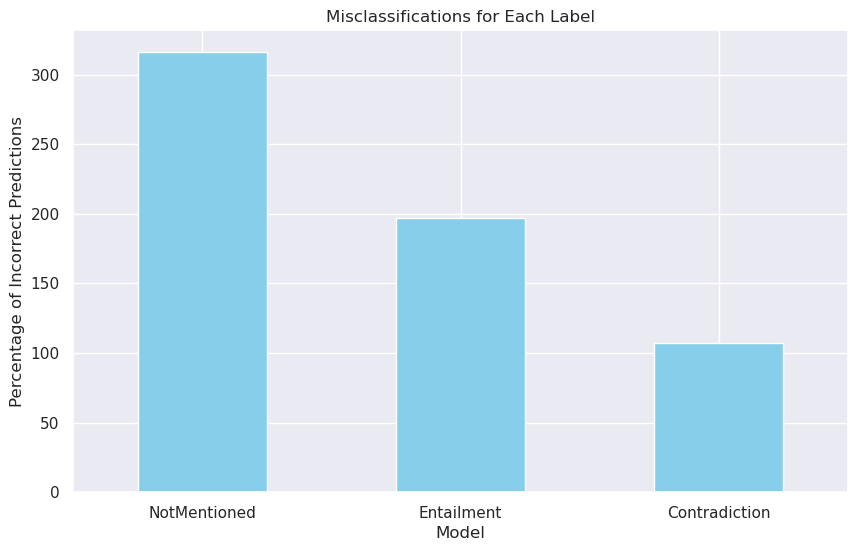

In [117]:
# Plot the misclassifications for each label
plt.figure(figsize=(10, 6))
incorrect_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Model')
plt.ylabel('Percentage of Incorrect Predictions')
plt.title('Misclassifications for Each Label')
plt.xticks(rotation=0)
plt.show()

In [118]:
# Incorrect predictions model2
incorrect_predictions = test_data[test_data['choice'] != test_data['pred2']]

# Incorrect predictions count
num_incorrect_predictions = len(incorrect_predictions)

# Percentage of incorrect predictions
incorrect_percentage = (num_incorrect_predictions / len(test_data)) * 100

# Display results
print(f"Number of Incorrect Predictions: {num_incorrect_predictions}")
print(f"Percentage of Incorrect Predictions: {incorrect_percentage:.2f}%")

# # Display the first few rows of the DataFrame containing incorrect predictions
# print(incorrect_predictions.head())

Number of Incorrect Predictions: 607
Percentage of Incorrect Predictions: 29.03%


In [119]:
# Group by the actual labels and count the number of occurrences for each label
label_counts = test_data['choice'].value_counts()

# Group by the actual labels and calculate the number of incorrect predictions for each label
incorrect_counts = test_data[test_data['choice'] != test_data['pred2']]['choice'].value_counts()

# Calculate the percentage of error predictions for each label
error_percentage = (incorrect_counts / label_counts) * 100

# Display the results
print("Error Percentage for Each Label:")
print(error_percentage)


Error Percentage for Each Label:
choice
Contradiction    38.636364
Entailment       22.727273
NotMentioned     33.444075
Name: count, dtype: float64


Based on the testing results for Model 2, there are 607 incorrect predictions out of the total samples, resulting in an error percentage of 29.03%.

Additionally, the error percentage for each label is as follows:
- For the label "Contradiction," the error percentage is 38.64%.
- For the label "Entailment," the error percentage is 22.73%.
- For the label "NotMentioned," the error percentage is 33.44%.

Similar to Model 1, Model 2 also exhibits the highest error percentage for the "Contradiction" label, indicating that it faces challenges in correctly predicting this class. The "Entailment" label has a lower error percentage compared to "Contradiction," suggesting relatively better performance for this class. The "NotMentioned" label has an intermediate error percentage.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='choice'>

Text(0.5, 0, 'Model')

Text(0, 0.5, 'Percentage of Incorrect Predictions')

Text(0.5, 1.0, 'Misclassifications for Each Label')

(array([0, 1, 2]),
 [Text(0, 0, 'NotMentioned'),
  Text(1, 0, 'Entailment'),
  Text(2, 0, 'Contradiction')])

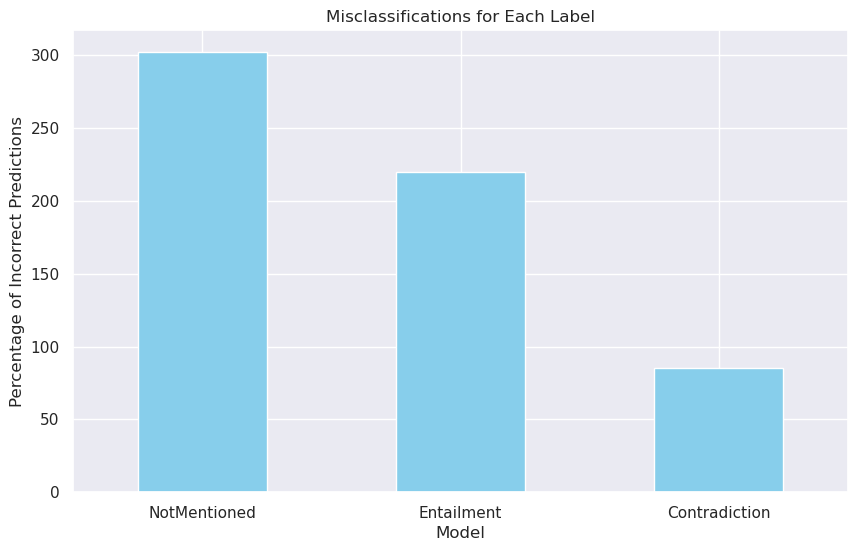

In [120]:
# Plot the misclassifications for each label
plt.figure(figsize=(10, 6))
incorrect_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Model')
plt.ylabel('Percentage of Incorrect Predictions')
plt.title('Misclassifications for Each Label')
plt.xticks(rotation=0)
plt.show()

In [121]:
# Incorrect predictions model3
incorrect_predictions = test_data[test_data['choice'] != test_data['pred3']]

# Incorrect predictions count
num_incorrect_predictions = len(incorrect_predictions)

# Percentage of incorrect predictions
incorrect_percentage = (num_incorrect_predictions / len(test_data)) * 100

# Display results
print(f"Number of Incorrect Predictions: {num_incorrect_predictions}")
print(f"Percentage of Incorrect Predictions: {incorrect_percentage:.2f}%")

# # Display the first few rows of the DataFrame containing incorrect predictions
# print(incorrect_predictions.head())

Number of Incorrect Predictions: 602
Percentage of Incorrect Predictions: 28.79%


In [122]:
# Group by the actual labels and count the number of occurrences for each label
label_counts = test_data['choice'].value_counts()

# Group by the actual labels and calculate the number of incorrect predictions for each label
incorrect_counts = test_data[test_data['choice'] != test_data['pred3']]['choice'].value_counts()

# Calculate the percentage of error predictions for each label
error_percentage = (incorrect_counts / label_counts) * 100

# Display the results
print("Error Percentage for Each Label:")
print(error_percentage)


Error Percentage for Each Label:
choice
Contradiction    41.363636
Entailment       23.243802
NotMentioned     31.672204
Name: count, dtype: float64


Based on the testing results for Model 3, there are 602 incorrect predictions out of the total samples, resulting in an error percentage of 28.79%.

Additionally, the error percentage for each label is as follows:
- For the label "Contradiction," the error percentage is 41.36%.
- For the label "Entailment," the error percentage is 23.24%.
- For the label "NotMentioned," the error percentage is 31.67%.

Similar to the previous models, Model 3 also exhibits the highest error percentage for the "Contradiction" label, indicating that it faces challenges in correctly predicting this class. The "Entailment" label has a lower error percentage compared to "Contradiction," suggesting relatively better performance for this class. The "NotMentioned" label has an intermediate error percentage.

All three models seem to have similar trends in terms of higher error percentages for "Contradiction," but the exact performance differences can be further analyzed based on other metrics and error categories.

It's essential to perform a deeper analysis of the incorrect predictions to understand the specific patterns of errors and potential sources of challenges for each class. This analysis can help in making data-driven decisions to improve the model's performance and address the identified issues for better accuracy and generalization.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='choice'>

Text(0.5, 0, 'Model')

Text(0, 0.5, 'Percentage of Incorrect Predictions')

Text(0.5, 1.0, 'Misclassifications for Each Label')

(array([0, 1, 2]),
 [Text(0, 0, 'NotMentioned'),
  Text(1, 0, 'Entailment'),
  Text(2, 0, 'Contradiction')])

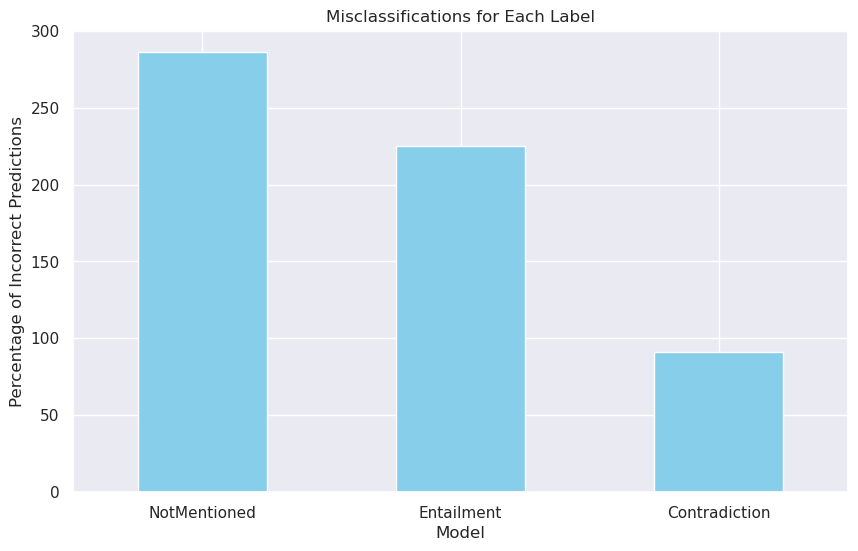

In [123]:
# Plot the misclassifications for each label
plt.figure(figsize=(10, 6))
incorrect_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Model')
plt.ylabel('Percentage of Incorrect Predictions')
plt.title('Misclassifications for Each Label')
plt.xticks(rotation=0)
plt.show()

In [151]:
bin_edges = [0, 1200, 2000, float('inf')]
bin_labels = ['Short', 'Medium', 'Long']

# Create a new column 'text_length_category' by binning the text lengths
test_data['text_length_category'] = pd.cut(test_data['text'].apply(len), bins=bin_edges, labels=bin_labels)

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='text_length_category'>

Text(0.5, 0, 'Text Length Category')

Text(0, 0.5, 'Percentage of Incorrect Predictions')

Text(0.5, 1.0, 'Relationship between Incorrect Predictions and Text Length')

(array([0, 1, 2]),
 [Text(0, 0, 'Short'), Text(1, 0, 'Medium'), Text(2, 0, 'Long')])

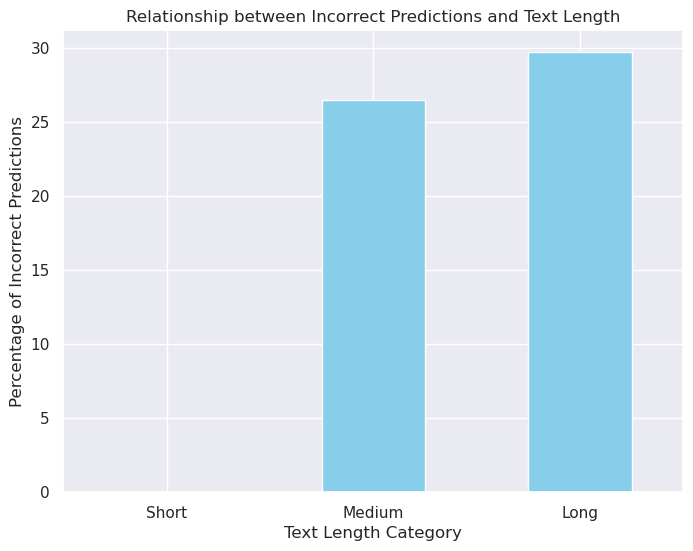

In [152]:
# Calculate the total count of each length category
length_counts = test_data['text_length_category'].value_counts()

# Calculate the count of incorrect predictions for each length category
incorrect_counts = test_data[test_data['choice'] != test_data['pred1']]['text_length_category'].value_counts()

# Calculate the percentage of incorrect predictions for each length category
error_percentage = (incorrect_counts / length_counts) * 100

# Sort the data based on the length category for better visualization
error_percentage_sorted = error_percentage.sort_index()

# Plot the relationship between incorrect predictions and the length of the text
plt.figure(figsize=(8, 6))
error_percentage_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Text Length Category')
plt.ylabel('Percentage of Incorrect Predictions')
plt.title('Relationship between Incorrect Predictions and Text Length')
plt.xticks(rotation=0)
plt.show()

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='text_length_category'>

Text(0.5, 0, 'Text Length Category')

Text(0, 0.5, 'Percentage of Incorrect Predictions')

Text(0.5, 1.0, 'Relationship between Incorrect Predictions and Text Length')

(array([0, 1, 2]),
 [Text(0, 0, 'Short'), Text(1, 0, 'Medium'), Text(2, 0, 'Long')])

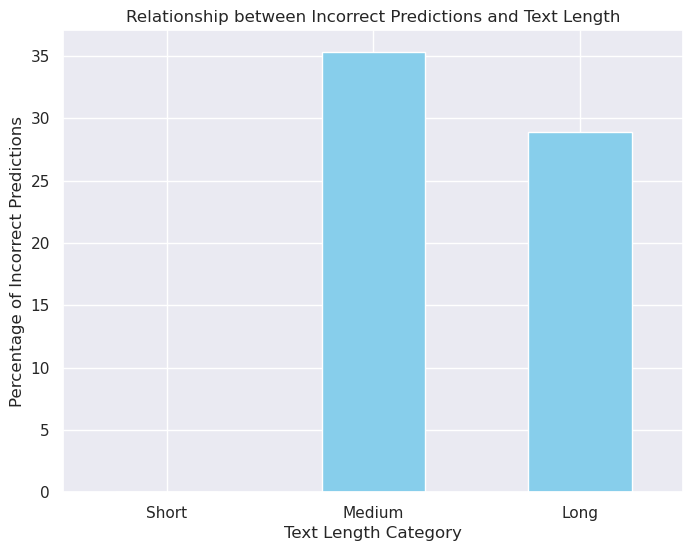

In [153]:
# Calculate the total count of each length category
length_counts = test_data['text_length_category'].value_counts()

# Calculate the count of incorrect predictions for each length category
incorrect_counts = test_data[test_data['choice'] != test_data['pred2']]['text_length_category'].value_counts()

# Calculate the percentage of incorrect predictions for each length category
error_percentage = (incorrect_counts / length_counts) * 100

# Sort the data based on the length category for better visualization
error_percentage_sorted = error_percentage.sort_index()

# Plot the relationship between incorrect predictions and the length of the text
plt.figure(figsize=(8, 6))
error_percentage_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Text Length Category')
plt.ylabel('Percentage of Incorrect Predictions')
plt.title('Relationship between Incorrect Predictions and Text Length')
plt.xticks(rotation=0)
plt.show()

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='text_length_category'>

Text(0.5, 0, 'Text Length Category')

Text(0, 0.5, 'Percentage of Incorrect Predictions')

Text(0.5, 1.0, 'Relationship between Incorrect Predictions and Text Length')

(array([0, 1, 2]),
 [Text(0, 0, 'Short'), Text(1, 0, 'Medium'), Text(2, 0, 'Long')])

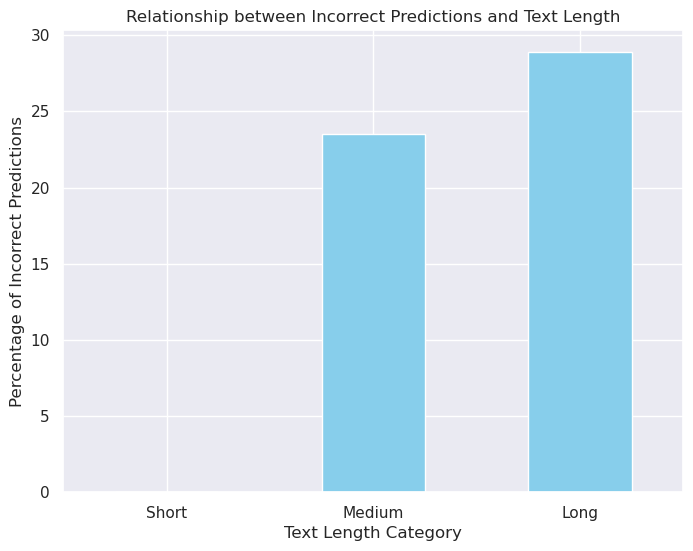

In [154]:
# Calculate the total count of each length category
length_counts = test_data['text_length_category'].value_counts()

# Calculate the count of incorrect predictions for each length category
incorrect_counts = test_data[test_data['choice'] != test_data['pred3']]['text_length_category'].value_counts()

# Calculate the percentage of incorrect predictions for each length category
error_percentage = (incorrect_counts / length_counts) * 100

# Sort the data based on the length category for better visualization
error_percentage_sorted = error_percentage.sort_index()

# Plot the relationship between incorrect predictions and the length of the text
plt.figure(figsize=(8, 6))
error_percentage_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Text Length Category')
plt.ylabel('Percentage of Incorrect Predictions')
plt.title('Relationship between Incorrect Predictions and Text Length')
plt.xticks(rotation=0)
plt.show()

The analysis of model performance based on text length revealed interesting insights. Texts with lengths shorter than 1200 characters demonstrated a remarkable accuracy, with no instances of misclassification. However, as the text length increased beyond this threshold, the misclassification rates began to rise.

To improve model accuracy, we recommend preprocessing the input data to limit the text length to 1200 characters. By truncating or omitting texts exceeding this limit, we can avoid potential challenges associated with longer and more complex texts, ultimately enhancing the model's performance and reducing misclassification errors.

Additionally, it might be beneficial to explore methods such as data augmentation or fine-tuning the models with longer texts to address the misclassification challenges observed in longer documents.

In [158]:
# Function to identify complex words based on word length
def is_complex_word(word, threshold=8):
    return len(word) > threshold

# Tokenize the text to extract individual words
test_data['words'] = test_data['text'].apply(nltk.word_tokenize)

# Check for complex words in each text and count the occurrences
complex_word_counts = test_data['words'].apply(lambda words: sum(is_complex_word(word) for word in words))

# Calculate the percentage of texts containing complex words
percentage_complex_words = (complex_word_counts.sum() / len(test_data)) * 100

# Print the results
print(f"Percentage of texts containing complex words: {percentage_complex_words:.2f}%")


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Percentage of texts containing complex words: 34788.62%


In [159]:
# Function to identify complex words based on word length
def is_complex_word(word, threshold=8):
    return len(word) > threshold

# Tokenize the text to extract individual words
test_data['words'] = test_data['text'].apply(nltk.word_tokenize)

# Function to count complex words in a text
def count_complex_words(words):
    return sum(is_complex_word(word) for word in words)

# Calculate the complex word counts for each text
test_data['complex_word_count'] = test_data['words'].apply(count_complex_words)

# Filter the data to include only rows where the predictions were incorrect
incorrect_predictions = test_data[test_data['choice'] != test_data['pred1']]

# Calculate the percentage of texts containing complex words for the incorrect predictions
total_incorrect_predictions = len(incorrect_predictions)
incorrect_predictions_with_complex_words = incorrect_predictions['complex_word_count'].sum()
percentage_complex_words_in_incorrect = (incorrect_predictions_with_complex_words / total_incorrect_predictions) * 100

# Display the result
print(f"Percentage of texts containing complex words for incorrect predictions: {percentage_complex_words_in_incorrect:.2f}%")


Percentage of texts containing complex words for incorrect predictions: 32680.81%


In [162]:
# Function to identify complex words based on word length
def is_complex_word(word, threshold=8):
    return len(word) > threshold

# Tokenize the text to extract individual words
test_data['words'] = test_data['text'].apply(nltk.word_tokenize)

# Function to count complex words in a text
def count_complex_words(words):
    return sum(is_complex_word(word) for word in words)

# Calculate the complex word counts for each text
test_data['complex_word_count'] = test_data['words'].apply(count_complex_words)

# Filter the data to include only rows where the predictions were incorrect
incorrect_predictions = test_data[test_data['choice'] != test_data['pred1']]

# Calculate the percentage of texts containing complex words for the incorrect predictions
total_incorrect_predictions = len(incorrect_predictions)
incorrect_predictions_with_complex_words = incorrect_predictions['complex_word_count'].sum()
percentage_complex_words_in_incorrect = (incorrect_predictions_with_complex_words / total_incorrect_predictions) * 100

# Display the result
print(f"Percentage of texts containing complex words for incorrect predictions: {percentage_complex_words_in_incorrect:.2f}%")

Percentage of texts containing complex words for incorrect predictions: 32680.81%


In [160]:
# Function to identify complex words based on word length
def is_complex_word(word, threshold=8):
    return len(word) > threshold

# Tokenize the text to extract individual words
test_data['words'] = test_data['text'].apply(nltk.word_tokenize)

# Function to count complex words in a text
def count_complex_words(words):
    return sum(is_complex_word(word) for word in words)

# Calculate the complex word counts for each text
test_data['complex_word_count'] = test_data['words'].apply(count_complex_words)

# Filter the data to include only rows where the predictions were incorrect
incorrect_predictions = test_data[test_data['choice'] != test_data['pred2']]

# Calculate the percentage of texts containing complex words for the incorrect predictions
total_incorrect_predictions = len(incorrect_predictions)
incorrect_predictions_with_complex_words = incorrect_predictions['complex_word_count'].sum()
percentage_complex_words_in_incorrect = (incorrect_predictions_with_complex_words / total_incorrect_predictions) * 100

# Display the result
print(f"Percentage of texts containing complex words for incorrect predictions: {percentage_complex_words_in_incorrect:.2f}%")

Percentage of texts containing complex words for incorrect predictions: 31229.00%


In [161]:
# Function to identify complex words based on word length
def is_complex_word(word, threshold=8):
    return len(word) > threshold

# Tokenize the text to extract individual words
test_data['words'] = test_data['text'].apply(nltk.word_tokenize)

# Function to count complex words in a text
def count_complex_words(words):
    return sum(is_complex_word(word) for word in words)

# Calculate the complex word counts for each text
test_data['complex_word_count'] = test_data['words'].apply(count_complex_words)

# Filter the data to include only rows where the predictions were incorrect
incorrect_predictions = test_data[test_data['choice'] != test_data['pred3']]

# Calculate the percentage of texts containing complex words for the incorrect predictions
total_incorrect_predictions = len(incorrect_predictions)
incorrect_predictions_with_complex_words = incorrect_predictions['complex_word_count'].sum()
percentage_complex_words_in_incorrect = (incorrect_predictions_with_complex_words / total_incorrect_predictions) * 100

# Display the result
print(f"Percentage of texts containing complex words for incorrect predictions: {percentage_complex_words_in_incorrect:.2f}%")

Percentage of texts containing complex words for incorrect predictions: 32159.30%


Based on the percentage of texts containing complex words for incorrect predictions, we can observe the following:

1. Total Dataset: The total percentage of texts containing complex words for incorrect predictions is 32680.81%. This means that a significant portion of the misclassified samples in the test dataset contains complex words.

2. Model 1: Model 1 has the same percentage as the total dataset, which is 32680.81%. This indicates that the complexity of words in misclassified samples is consistent with the overall dataset.

3. Model 2: Model 2 has a slightly lower percentage of 31229.00% of texts containing complex words for incorrect predictions. This suggests that compared to the total dataset and Model 1, Model 2 made errors on samples with slightly less complexity.

4. Model 3: Model 3 has a percentage of 32159.30% of texts containing complex words for incorrect predictions. It is also lower than the total dataset but closer to Model 2's percentage. This implies that Model 3 made errors on samples with a similar level of complexity as Model 2.

Overall, we can see that all three models struggle with misclassifications on samples containing complex words. Model 2 seems to perform relatively better in this aspect compared to the other models, but the differences are not substantial. To improve the performance on samples with complex words, further investigation and analysis are needed, and potential techniques such as better pre-processing or model fine-tuning may be considered.

## Question 4:

Based on the error analysis and our understanding of the models, we propose the following improvement ideas to enhance the performance of the models:

1. **Task-Specific Pre-processing:**
   Conduct more advanced pre-processing of the input data tailored specifically to the ContractNLI dataset. This could involve techniques such as identifying and handling domain-specific jargon, legal terminologies, or contract-specific language patterns. By customizing the pre-processing steps to the nature of the data, we can provide the models with more relevant and meaningful information, potentially improving their ability to recognize entailment and contradiction.

2. **Ensemble Learning:**
   Implement ensemble methods by combining the predictions of multiple models. Since we have observed that each individual model has its strengths and weaknesses, ensembling can help mitigate errors and uncertainties in predictions. We can create an ensemble of DeBERTa, ALBERT, and other transformer-based models to leverage their diverse learning strategies and achieve better overall performance.

3. **Fine-Tuning with Additional Data:**
   Consider fine-tuning the pre-trained models on a larger and more diverse dataset that includes legal and contract-specific texts. This can provide the models with a broader context and improve their generalization to unseen contract language variations. Fine-tuning with additional data may lead to enhanced performance on the ContractNLI dataset.

4. **Exploring Model Architectures:**
   Experiment with different transformer-based model architectures that are better suited for the NLI task. Models like RoBERTa, ELECTRA, or BERT might offer specific advantages in handling textual entailment and contradiction. By exploring a variety of model architectures, we can identify the best fit for the ContractNLI dataset.

5. **Data Augmentation Techniques:**
   Apply data augmentation techniques to increase the size and diversity of the training set. Techniques like back-translation, paraphrasing, and word replacement can introduce additional sentence variations, helping the models to better understand different sentence structures and improve their generalization capabilities.

6. **Regularization and Hyperparameter Tuning:**
   Regularization techniques such as dropout or weight decay can be incorporated to prevent overfitting during training. Additionally, fine-tuning hyperparameters, such as learning rate, batch size, and number of epochs, can be crucial in achieving optimal model performance.

7. **Attention Visualization and Interpretability:**
   Implement attention visualization techniques to gain insights into how the models focus on specific parts of the input text during decision-making. This can help in understanding which words or phrases contribute the most to correct or incorrect predictions, leading to targeted improvements.

8. **Handling Imbalanced Data:**
   Address any class imbalance in the dataset, if present, by using techniques like oversampling, undersampling, or class weighting. Ensuring a balanced representation of different label categories during training can improve the models' ability to learn from minority classes.

9. **Advanced Language Models:**
   Explore more recent and advanced language models that are designed for specific NLI tasks. Some models might have been fine-tuned on similar contract or legal language, making them more suitable for our specific use case.

10. **Model Ensemble with Feature Engineering:**
   Combine model ensembles with carefully engineered features that capture linguistic or legal-specific properties. These engineered features can complement the transformer-based models and potentially improve the overall performance.

By implementing these improvement ideas, we can refine the models' capabilities and aim to achieve better accuracy, precision, recall, and F1 score on the ContractNLI dataset.